In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors 

import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [52]:
#pick={therm,inhomov1,inhomov2,pure} pick one of these to properly store images with the correct labels
dataset_label = "pure"
#network size i.e num of qubits
size=8


In [ ]:
#Load data

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/mimic")

In [35]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/landscape_maximizes")

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/strongest_maximizes")
newdata5 = h5py.File("../data/strongest_maximizes/strongest_maximizes.hdf5")

In [54]:
newdata1 = h5py.File("../data/random/random.hdf5")
newdata2 = h5py.File("../data/greedy/greedy.hdf5")
newdata3 = h5py.File("../data/mimic/mimic.hdf5")
newdata4 = h5py.File("../data/landscape_maximizes/landscape_maximizes.hdf5")

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '../data/random/random.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [7]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [15]:
#Only run if you want to see the format of the data

In [ ]:
def print_hdf5_structure(file_path):
    with h5py.File(file_path, 'r') as file:
        def print_group(name, obj):
            if isinstance(obj, h5py.Group):
                print(f'Group: {name}')
                for key in obj.keys():
                    print(f'  {key}')
            elif isinstance(obj, h5py.Dataset):
                print(f'Dataset: {name}')

        file.visititems(print_group)

# Replace with the path to your merged HDF5 file
file_path = '../data/random/random.hdf5'  
print_hdf5_structure(file_path)

In [ ]:
#Code that locates the choice of neighbourhoods 

In [8]:
import h5py
def load_orders_list(file_path: str, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name: str):
    # Create an empty dictionary to hold orders_list
    orders_list = []

    with h5py.File(file_path, 'r') as file:
        # Construct the path to the specific group where orders_list is stored
        group_name = f"{num_qubits} qubits/{connectivity} connectivity/unitary energy subspace {unitary_energy_subspace}/unitary seed {unitary_seed}/ordering seed {order_rule_name}/previous_order"
        
        # Check if the group exists
        if group_name in file:
            group = file[group_name]
            for time_index in group:
                # Assuming the order data is stored in a dataset named 'data'
                orders_list.append(group[time_index]['data'][()])
        else:
            print(f"Group '{group_name}' not found in file.")
    
    return orders_list


In [ ]:
#Example of extracting data using above code. This will give a list of array of arrays where each array
#is a complete K2 selection of connectivity on the network

In [9]:
# Set your parameters
file_path = "../data/landscape_maximizes/landscape_maximizes.hdf5"  # Path to your combined HDF5 file
num_qubits = 8
connectivity = 'cN_2local'  # Replace with actual connectivity value
unitary_energy_subspace = '1'  # Replace with actual value
unitary_seed = '0'  # Replace with actual value
order_rule_name = 'landscape_maximizes'  # Replace with actual rule

# Load orders_list
orders_list = load_orders_list(file_path, num_qubits, connectivity, unitary_energy_subspace, unitary_seed, order_rule_name)
orders_list[0][490]
# Print the loaded orders_list

array([[2, 3],
       [1, 7],
       [0, 4],
       [5, 6]])

In [ ]:
#Emergent graph for a particular simulation given by the "unitary seed" for a given size system with given rule. 
#Note that this gives the total emergent graph and no information about the temporal evolution.

In [9]:
#C2 
num_qubits=8
conn="c2_2local"
unitary_seed=5

outputs_R5_c2=[]
for unitary_seed in range(100):
    outputs_R5_c2.append(load_orders_list("../data/strongest_maximizes/strongest_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'strongest_maximizes')[0][10:])
outputs_R5_c2

#C4 
num_qubits=8
conn="c4_2local"
unitary_seed=5

outputs_R5_c4=[]
for unitary_seed in range(100):
    outputs_R5_c4.append(load_orders_list("../data/strongest_maximizes/strongest_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'strongest_maximizes')[0][10:])
outputs_R5_c4

#C5
num_qubits=8
conn="c5_2local"
unitary_seed=5
outputs_R5_c5=[]
for unitary_seed in range(100):
    outputs_R5_c5.append(load_orders_list("../data/strongest_maximizes/strongest_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'strongest_maximizes')[0][10:])
outputs_R5_c5

#C6 
num_qubits=8
conn="c6_2local"
unitary_seed=5
outputs_R5_c6=[]
for unitary_seed in range(100):
    outputs_R5_c6.append(load_orders_list("../data/strongest_maximizes/strongest_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'strongest_maximizes')[0][10:])
outputs_R5_c6

#Cn 
num_qubits=8
conn="cN_2local"
unitary_seed=5
outputs_R5_cn=[]
for unitary_seed in range(100):
    outputs_R5_cn.append(load_orders_list("../data/strongest_maximizes/strongest_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'strongest_maximizes')[0][10:])
outputs_R5_cn



[array([[[4, 5],
         [1, 6],
         [0, 2],
         [3, 7]],
 
        [[4, 5],
         [6, 7],
         [0, 2],
         [1, 3]],
 
        [[4, 5],
         [0, 2],
         [1, 7],
         [3, 6]],
 
        ...,
 
        [[0, 4],
         [3, 6],
         [2, 7],
         [1, 5]],
 
        [[2, 6],
         [1, 3],
         [4, 7],
         [0, 5]],
 
        [[1, 6],
         [2, 7],
         [0, 5],
         [3, 4]]]),
 array([[[4, 6],
         [1, 3],
         [2, 7],
         [0, 5]],
 
        [[4, 5],
         [1, 6],
         [0, 2],
         [3, 7]],
 
        [[4, 5],
         [1, 6],
         [0, 2],
         [3, 7]],
 
        ...,
 
        [[4, 7],
         [0, 2],
         [3, 6],
         [1, 5]],
 
        [[3, 7],
         [2, 5],
         [1, 4],
         [0, 6]],
 
        [[3, 7],
         [2, 5],
         [1, 4],
         [0, 6]]]),
 array([[[4, 7],
         [0, 2],
         [3, 6],
         [1, 5]],
 
        [[4, 7],
         [0, 2],
         [3, 

In [31]:
#code to generate how many time a particular neighbourhood shows up
from collections import defaultdict
occurrences = defaultdict(int)

# Loop through the array and count each neighbourhood's occurrence
def dictionary_of_neighbourhoods(array_of_arrays_of_arrays):
    for array in array_of_arrays_of_arrays:
        for subarray in array:
        # Convert each list (subarray) to a tuple (to make it hashable)
            tuple_subarray = tuple(map(tuple, subarray))  # Convert list of lists to tuple of tuples
            occurrences[tuple_subarray] += 1

# Print the occurrences of each neighbourhood
    dictionary = []
    for key, value in occurrences.items():
        dictionary.append([key, value])
    return dictionary

In [32]:
dictionary_of_neighbourhoods(outputs_R1_c2)

[[((0, 1), (6, 7), (4, 5), (2, 3)), 24460],
 [((0, 7), (1, 2), (3, 4), (5, 6)), 24440]]

In [45]:
#C2 
num_qubits=8
conn="c2_2local"
unitary_seed=5

outputs_R1_c2=[]
for unitary_seed in range(100):
    outputs_R1_c2.append(load_orders_list("../data/random/random.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
outputs_R1_c2

outputs_R2_c2=[]
for unitary_seed in range(100):
    outputs_R2_c2.append(load_orders_list("../data/greedy/greedy.hdf5", num_qubits, conn, 1, unitary_seed, 'greedy')[0][10:])
outputs_R2_c2;

outputs_R3_c2=[]
for unitary_seed in range(100):
    outputs_R3_c2.append(load_orders_list("../data/mimic/mimic.hdf5", num_qubits, conn, 1, unitary_seed, 'mimic')[0][10:])
outputs_R3_c2;

outputs_R4_c2=[]
for unitary_seed in range(100):
    outputs_R4_c2.append(load_orders_list("../data/landscape_maximizes/landscape_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'landscape_maximizes')[0][10:])
outputs_R4_c2

[array([[[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        ...,
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]]]),
 array([[[0, 1],
         [6, 7],
         [4, 5],
         [2, 3]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 1],
         [6, 7],
         [4, 5],
         [2, 3]],
 
        ...,
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]]]),
 array([[[0, 7],
         [1, 2],
         [3, 4],
         [5, 6]],
 
        [[0, 1],
         [6, 7],
         [4, 

In [46]:
#C4
num_qubits=8
conn="c4_2local"
unitary_seed=5

outputs_R1_c4=[]
for unitary_seed in range(100):
    outputs_R1_c4.append(load_orders_list("../data/random/random.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
(np.array(outputs_R1_c4)).flatten()

outputs_R2_c4=[]
for unitary_seed in range(100):
    outputs_R2_c4.append(load_orders_list("../data/greedy/greedy.hdf5", num_qubits, conn, 1, unitary_seed, 'greedy')[0][10:])
outputs_R2_c4;

outputs_R3_c4=[]
for unitary_seed in range(100):
    outputs_R3_c4.append(load_orders_list("../data/mimic/mimic.hdf5", num_qubits, conn, 1, unitary_seed, 'mimic')[0][10:])
outputs_R3_c4;

outputs_R4_c4=[]
for unitary_seed in range(100):
    outputs_R4_c4.append(load_orders_list("../data/landscape_maximizes/landscape_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'landscape_maximizes')[0][10:])
outputs_R4_c4

[array([[[4, 6],
         [0, 7],
         [1, 2],
         [3, 5]],
 
        [[4, 6],
         [0, 7],
         [1, 2],
         [3, 5]],
 
        [[4, 6],
         [0, 7],
         [1, 2],
         [3, 5]],
 
        ...,
 
        [[4, 5],
         [6, 7],
         [0, 2],
         [1, 3]],
 
        [[4, 6],
         [0, 7],
         [1, 2],
         [3, 5]],
 
        [[4, 5],
         [6, 7],
         [0, 2],
         [1, 3]]]),
 array([[[1, 7],
         [2, 4],
         [3, 5],
         [0, 6]],
 
        [[1, 7],
         [2, 4],
         [3, 5],
         [0, 6]],
 
        [[1, 7],
         [2, 4],
         [3, 5],
         [0, 6]],
 
        ...,
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]],
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]],
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]]]),
 array([[[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        [[0, 2],
         [4, 6],
         [1, 

In [47]:
#C5
num_qubits=8
conn="c5_2local"
unitary_seed=5

outputs_R1_c5=[]
for unitary_seed in range(100):
    outputs_R1_c5.append(load_orders_list("../data/random/random.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
(np.array(outputs_R1_c5)).flatten()

outputs_R2_c5=[]
for unitary_seed in range(100):
    outputs_R2_c5.append(load_orders_list("../data/greedy/greedy.hdf5", num_qubits, conn, 1, unitary_seed, 'greedy')[0][10:])
outputs_R2_c5;

outputs_R3_c5=[]
for unitary_seed in range(100):
    outputs_R3_c5.append(load_orders_list("../data/mimic/mimic.hdf5", num_qubits, conn, 1, unitary_seed, 'mimic')[0][10:])
outputs_R3_c5;

outputs_R4_c5=[]
for unitary_seed in range(100):
    outputs_R4_c5.append(load_orders_list("../data/landscape_maximizes/landscape_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'landscape_maximizes')[0][10:])
outputs_R4_c5

[array([[[2, 3],
         [1, 7],
         [0, 4],
         [5, 6]],
 
        [[0, 1],
         [6, 7],
         [4, 5],
         [2, 3]],
 
        [[2, 3],
         [1, 7],
         [0, 4],
         [5, 6]],
 
        ...,
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]],
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]],
 
        [[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]]]),
 array([[[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        [[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        [[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        ...,
 
        [[3, 7],
         [4, 5],
         [1, 2],
         [0, 6]],
 
        [[3, 7],
         [4, 5],
         [1, 2],
         [0, 6]],
 
        [[3, 7],
         [4, 5],
         [1, 2],
         [0, 6]]]),
 array([[[2, 4],
         [1, 3],
         [5, 7],
         [0, 6]],
 
        [[2, 4],
         [1, 3],
         [5, 

In [48]:
#C6
num_qubits=8
conn="c6_2local"
unitary_seed=5

outputs_R1_c6=[]
for unitary_seed in range(100):
    outputs_R1_c6.append(load_orders_list("../data/random/random.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
(np.array(outputs_R1_c6)).flatten()

outputs_R2_c6=[]
for unitary_seed in range(100):
    outputs_R2_c6.append(load_orders_list("../data/greedy/greedy.hdf5", num_qubits, conn, 1, unitary_seed, 'greedy')[0][10:])
outputs_R2_c6;

outputs_R3_c6=[]
for unitary_seed in range(100):
    outputs_R3_c6.append(load_orders_list("../data/mimic/mimic.hdf5", num_qubits, conn, 1, unitary_seed, 'mimic')[0][10:])
outputs_R3_c6;

outputs_R4_c6=[]
for unitary_seed in range(100):
    outputs_R4_c6.append(load_orders_list("../data/landscape_maximizes/landscape_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'landscape_maximizes')[0][10:])
outputs_R4_c6

[array([[[1, 2],
         [0, 3],
         [4, 7],
         [5, 6]],
 
        [[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        [[0, 2],
         [4, 6],
         [1, 3],
         [5, 7]],
 
        ...,
 
        [[1, 4],
         [2, 7],
         [0, 5],
         [3, 6]],
 
        [[6, 7],
         [0, 2],
         [3, 5],
         [1, 4]],
 
        [[6, 7],
         [2, 4],
         [1, 3],
         [0, 5]]]),
 array([[[4, 6],
         [1, 7],
         [0, 3],
         [2, 5]],
 
        [[4, 6],
         [1, 7],
         [0, 3],
         [2, 5]],
 
        [[1, 7],
         [0, 3],
         [2, 4],
         [5, 6]],
 
        ...,
 
        [[0, 1],
         [2, 4],
         [5, 7],
         [3, 6]],
 
        [[0, 1],
         [2, 4],
         [5, 7],
         [3, 6]],
 
        [[1, 6],
         [0, 2],
         [4, 7],
         [3, 5]]]),
 array([[[0, 2],
         [5, 6],
         [3, 4],
         [1, 7]],
 
        [[0, 2],
         [5, 6],
         [3, 

In [49]:
#CN
num_qubits=8
conn="cN_2local"
unitary_seed=5

outputs_R1_cn=[]
for unitary_seed in range(100):
    outputs_R1_cn.append(load_orders_list("../data/random/random.hdf5", num_qubits, conn, 1, unitary_seed, 'random')[0][10:])
(np.array(outputs_R1_cn)).flatten()

outputs_R2_cn=[]
for unitary_seed in range(100):
    outputs_R2_cn.append(load_orders_list("../data/greedy/greedy.hdf5", num_qubits, conn, 1, unitary_seed, 'greedy')[0][10:])
outputs_R2_cn;

outputs_R3_cn=[]
for unitary_seed in range(100):
    outputs_R3_cn.append(load_orders_list("../data/mimic/mimic.hdf5", num_qubits, conn, 1, unitary_seed, 'mimic')[0][10:])
outputs_R3_cn;

outputs_R4_cn=[]
for unitary_seed in range(100):
    outputs_R4_cn.append(load_orders_list("../data/landscape_maximizes/landscape_maximizes.hdf5", num_qubits, conn, 1, unitary_seed, 'landscape_maximizes')[0][10:])
outputs_R4_cn

[array([[[0, 1],
         [2, 4],
         [5, 7],
         [3, 6]],
 
        [[0, 1],
         [2, 4],
         [5, 7],
         [3, 6]],
 
        [[0, 1],
         [6, 7],
         [2, 4],
         [3, 5]],
 
        ...,
 
        [[1, 7],
         [2, 5],
         [3, 4],
         [0, 6]],
 
        [[0, 4],
         [3, 6],
         [2, 7],
         [1, 5]],
 
        [[1, 7],
         [2, 5],
         [3, 4],
         [0, 6]]]),
 array([[[0, 7],
         [1, 6],
         [2, 5],
         [3, 4]],
 
        [[0, 7],
         [1, 6],
         [2, 5],
         [3, 4]],
 
        [[1, 6],
         [0, 2],
         [3, 4],
         [5, 7]],
 
        ...,
 
        [[1, 7],
         [2, 5],
         [3, 4],
         [0, 6]],
 
        [[4, 6],
         [1, 2],
         [0, 3],
         [5, 7]],
 
        [[1, 7],
         [2, 5],
         [3, 4],
         [0, 6]]]),
 array([[[0, 1],
         [3, 7],
         [2, 5],
         [4, 6]],
 
        [[3, 7],
         [2, 5],
         [1, 

In [39]:
#Ensemble averaged emergent network
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm
import numpy as np

#Compute ensemble average 
def compute_ensemble_average(dataset_for_one_rule):
    """
    Compute the ensemble average adjacency matrix from a list of datasets.
    """
    # Initialize adj_matrix_sum to None to indicate it's uninitialized
    adj_matrix_sum = None
    
    # Loop over all datasets and compute the adjacency matrix for each
    for data in dataset_for_one_rule:
        # Flatten the dataset into a list of tuples representing pairs
        edges = [tuple(sorted(pair)) for sublist in data for pair in sublist]
        
        # Count the number of times each node pair appears
        edge_weights = Counter(edges)
        #print(f'edgew:{edge_weights}')

        # Create a graph
        G = nx.Graph()

        # Add edges along with their weights
        for edge, weight in edge_weights.items():
            G.add_edge(edge[0], edge[1], weight=weight/len(data))

        # Get the edge weights
        weights = np.array([G[u][v]['weight'] for u, v in G.edges()])

        # Calculate the adjacency matrix for this dataset
        n_nodes = max(max(edge) for edge in edges) + 1
        adj_matrix = np.zeros((n_nodes, n_nodes))

        for edge, weight in edge_weights.items():
            adj_matrix[edge[0], edge[1]] = weight/len(data)
            adj_matrix[edge[1], edge[0]] = weight/len(data)
            
        # Check the row sums before averaging
        row_sums = adj_matrix.sum(axis=1)
        #print(f"RowS: {row_sums}")
        adj_matrix = np.round(adj_matrix, 2)
        #print(f"Adj: {adj_matrix}")

        # Initialize adj_matrix_sum on the first iteration
        if adj_matrix_sum is None:
            adj_matrix_sum = np.zeros_like(adj_matrix)
        
        # Accumulate the adjacency matrices
        adj_matrix_sum += adj_matrix
    ensemble_avg_matrix=adj_matrix_sum / len(dataset_for_one_rule)
    ensemble_avg_matrix = np.round(ensemble_avg_matrix, 2)
    # Compute the ensemble average
    return ensemble_avg_matrix

In [16]:
#compute_ensemble_average(outputs_R4_c2)

In [40]:
# Function to visualize the average adjacency matrix
def visualize_network(adj_matrix, ax, title, pos, cmap):
    """
    Visualizes a network based on the provided adjacency matrix.
    """
    # Create a graph
    G = nx.from_numpy_array(adj_matrix)  # Use from_numpy_array instead of from_numpy_matrix

    # Normalize the weights for color mapping
    weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
    norm = plt.Normalize(vmin=0, vmax=1)

    # Map edge weights to colors using the given colormap
    edge_colors = [cmap(norm(w)) for w in weights]

    # Scale edge thickness according to the weight (here using width factor for better visibility)
    #min_width = 0.5  # Minimum edge width (for visualization)
    #max_width = 5.0  # Maximum edge width (for visualization)
    #edge_widths = min_width + (weights - np.min(weights)) / (np.max(weights) - np.min(weights)) * (max_width - min_width)

    # Draw the graph with node labels
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            edge_color=edge_colors, width=3, ax=ax)

    # Draw edge labels to show weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    # Add a color bar to show the weight scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    #plt.colorbar(sm, ax=ax, label="Edge weight")

    # Add a title to each subplot
    ax.set_title(title,fontsize=14)

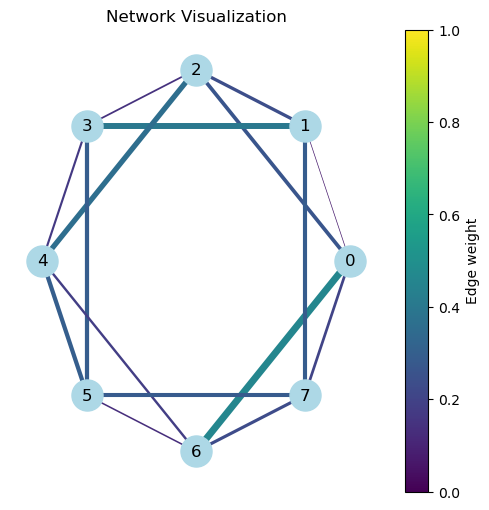

In [300]:
#Here is an example
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

# Define a colormap and positions for nodes
cmap = cm.viridis
pos = nx.circular_layout(nx.from_numpy_array(compute_ensemble_average(outputs_R2_c2)))

# Call the visualize function
visualize_network(compute_ensemble_average(outputs_R5_c4), ax, "Network Visualization", pos, cmap)

# Show the plot
plt.show()


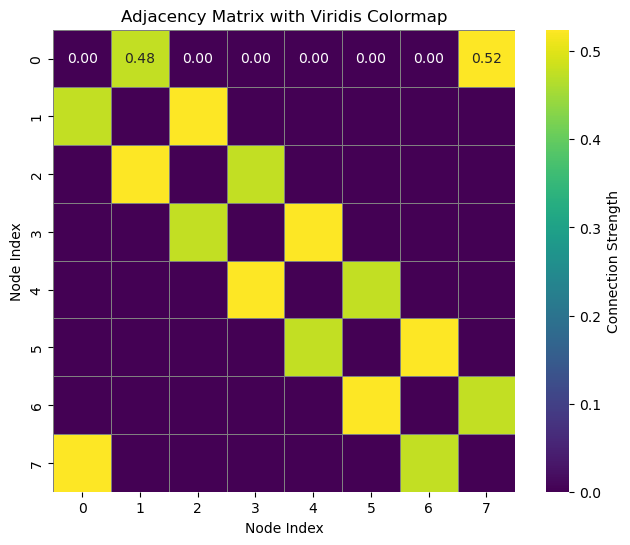

In [256]:
#plot the adjacency matrix
# Your adjacency matrix
adj_matrix = np.array([[0.    , 0.4755, 0.    , 0.    , 0.    , 0.    , 0.    , 0.5245],
                       [0.4755, 0.    , 0.5245, 0.    , 0.    , 0.    , 0.    , 0.    ],
                       [0.    , 0.5245, 0.    , 0.4755, 0.    , 0.    , 0.    , 0.    ],
                       [0.    , 0.    , 0.4755, 0.    , 0.5245, 0.    , 0.    , 0.    ],
                       [0.    , 0.    , 0.    , 0.5245, 0.    , 0.4755, 0.    , 0.    ],
                       [0.    , 0.    , 0.    , 0.    , 0.4755, 0.    , 0.5245, 0.    ],
                       [0.    , 0.    , 0.    , 0.    , 0.    , 0.5245, 0.    , 0.4755],
                       [0.5245, 0.    , 0.    , 0.    , 0.    , 0.    , 0.4755, 0.    ]])

# Create the plot
plt.figure(figsize=(8, 6))

# Use seaborn heatmap for better visualization
sns.heatmap(adj_matrix, cmap='viridis', annot=True, fmt=".2f", cbar=True, 
            linewidths=0.5, linecolor='gray', square=True, 
            cbar_kws={"label": "Connection Strength"})

# Add titles and labels (if necessary)
plt.title("Adjacency Matrix with Viridis Colormap")
plt.xlabel("Node Index")
plt.ylabel("Node Index")

# Show the plot
plt.show()


Adj_mat:[array([[0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0.5],
       [0.5, 0. , 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
       [0.5, 0. , 0. , 0. , 0. , 0. , 0.5, 0. ]]), array([[0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.94],
       [0.06, 0.  , 0.94, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.94, 0.  , 0.06, 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.06, 0.  , 0.94, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.94, 0.  , 0.06, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.94, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.06],
       [0.94, 0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  ]]), array([[0.  , 0.29, 0.  , 0.  , 0.  , 0.  , 0.  , 0.71],
       [0.29, 0.  , 0.71, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.71, 0.  ,

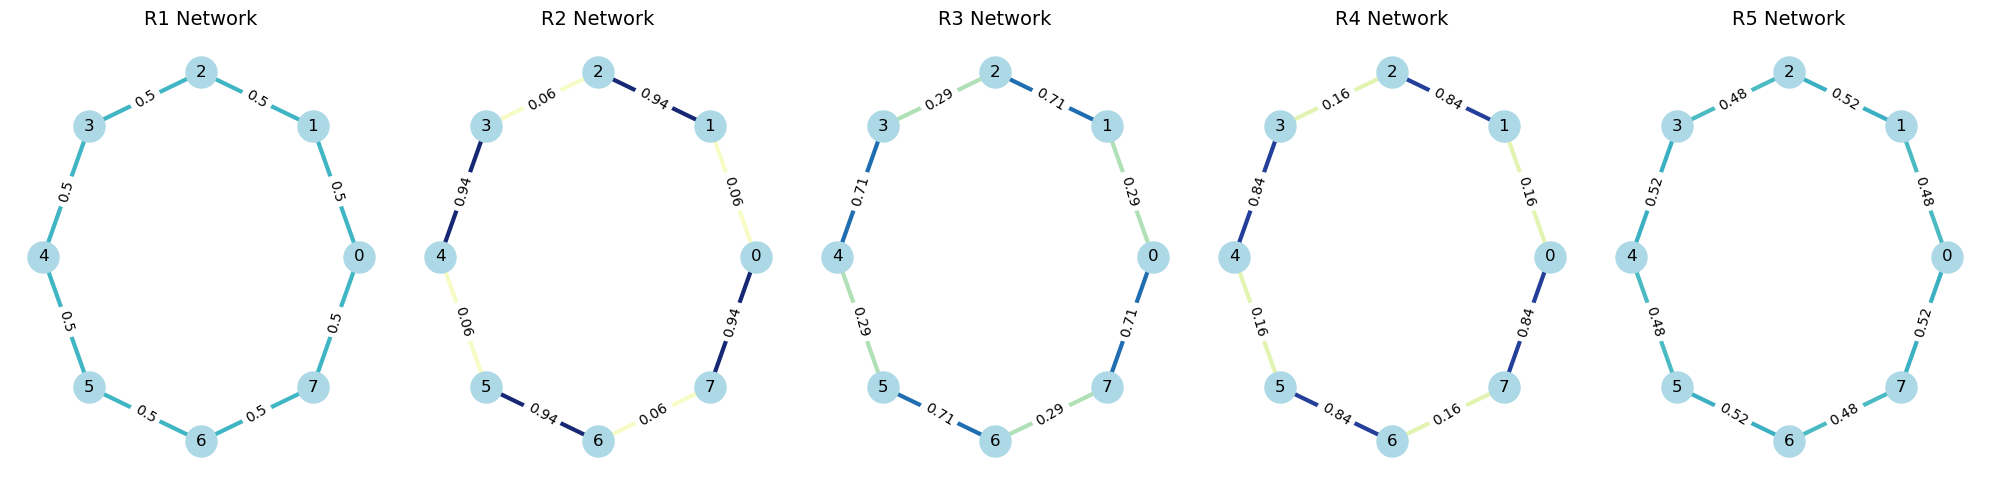

Adj_mat:[array([[0.  , 0.21, 0.28, 0.  , 0.  , 0.  , 0.28, 0.22],
       [0.21, 0.  , 0.21, 0.29, 0.  , 0.  , 0.  , 0.29],
       [0.28, 0.21, 0.  , 0.21, 0.29, 0.  , 0.  , 0.  ],
       [0.  , 0.29, 0.21, 0.  , 0.21, 0.29, 0.  , 0.  ],
       [0.  , 0.  , 0.29, 0.21, 0.  , 0.21, 0.28, 0.  ],
       [0.  , 0.  , 0.  , 0.29, 0.21, 0.  , 0.22, 0.28],
       [0.28, 0.  , 0.  , 0.  , 0.28, 0.22, 0.  , 0.21],
       [0.22, 0.29, 0.  , 0.  , 0.  , 0.28, 0.21, 0.  ]]), array([[0.  , 0.16, 0.43, 0.  , 0.  , 0.  , 0.23, 0.18],
       [0.16, 0.  , 0.17, 0.35, 0.  , 0.  , 0.  , 0.32],
       [0.43, 0.17, 0.  , 0.19, 0.21, 0.  , 0.  , 0.  ],
       [0.  , 0.35, 0.19, 0.  , 0.23, 0.23, 0.  , 0.  ],
       [0.  , 0.  , 0.21, 0.23, 0.  , 0.23, 0.33, 0.  ],
       [0.  , 0.  , 0.  , 0.23, 0.23, 0.  , 0.24, 0.3 ],
       [0.23, 0.  , 0.  , 0.  , 0.33, 0.24, 0.  , 0.2 ],
       [0.18, 0.32, 0.  , 0.  , 0.  , 0.3 , 0.2 , 0.  ]]), array([[0.  , 0.24, 0.27, 0.  , 0.  , 0.  , 0.27, 0.22],
       [0.24, 0.  

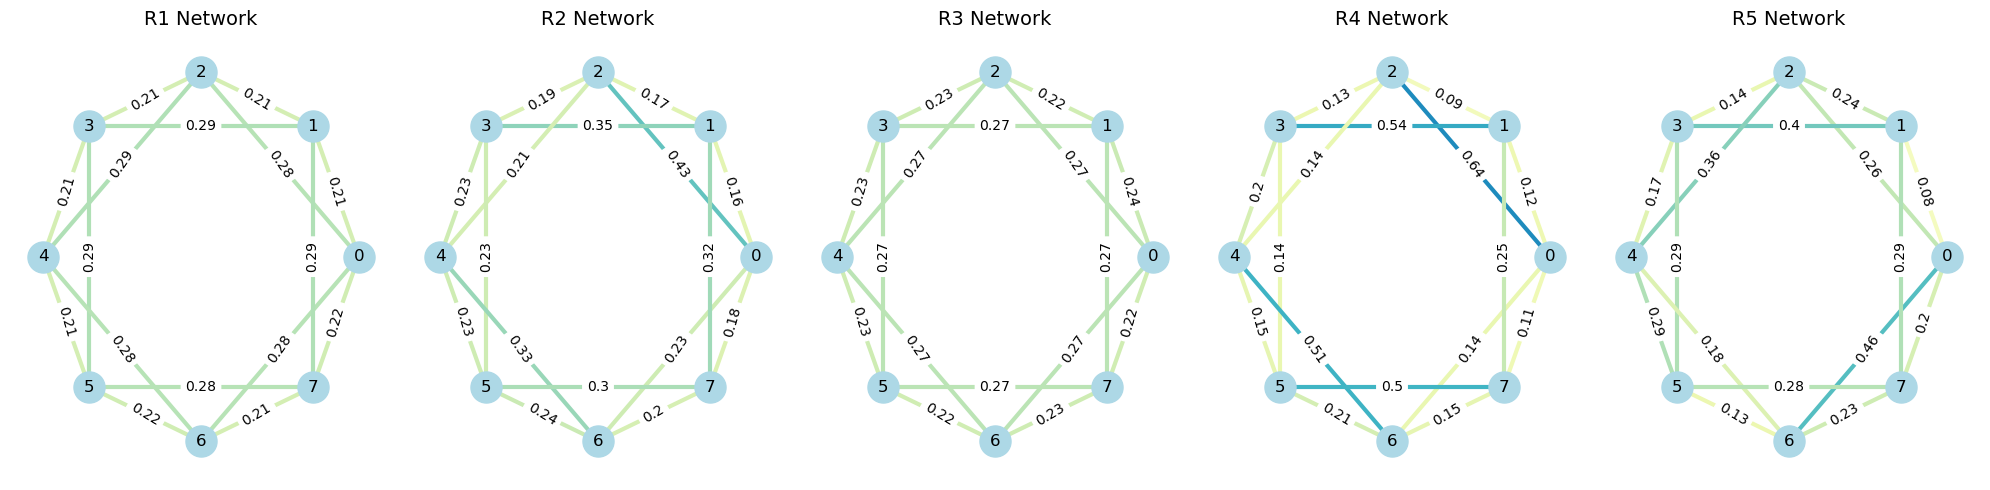

Adj_mat:[array([[0.  , 0.19, 0.19, 0.  , 0.23, 0.  , 0.19, 0.19],
       [0.19, 0.  , 0.19, 0.19, 0.  , 0.23, 0.  , 0.19],
       [0.19, 0.19, 0.  , 0.19, 0.19, 0.  , 0.22, 0.  ],
       [0.  , 0.19, 0.19, 0.  , 0.19, 0.19, 0.  , 0.22],
       [0.23, 0.  , 0.19, 0.19, 0.  , 0.19, 0.19, 0.  ],
       [0.  , 0.23, 0.  , 0.19, 0.19, 0.  , 0.19, 0.19],
       [0.19, 0.  , 0.22, 0.  , 0.19, 0.19, 0.  , 0.2 ],
       [0.19, 0.19, 0.  , 0.22, 0.  , 0.19, 0.2 , 0.  ]]), array([[0.  , 0.16, 0.22, 0.  , 0.22, 0.  , 0.22, 0.18],
       [0.16, 0.  , 0.21, 0.23, 0.  , 0.21, 0.  , 0.2 ],
       [0.22, 0.21, 0.  , 0.17, 0.19, 0.  , 0.22, 0.  ],
       [0.  , 0.23, 0.17, 0.  , 0.16, 0.2 , 0.  , 0.24],
       [0.22, 0.  , 0.19, 0.16, 0.  , 0.2 , 0.23, 0.  ],
       [0.  , 0.21, 0.  , 0.2 , 0.2 , 0.  , 0.17, 0.22],
       [0.22, 0.  , 0.22, 0.  , 0.23, 0.17, 0.  , 0.16],
       [0.18, 0.2 , 0.  , 0.24, 0.  , 0.22, 0.16, 0.  ]]), array([[0.  , 0.19, 0.2 , 0.  , 0.21, 0.  , 0.2 , 0.19],
       [0.19, 0.  

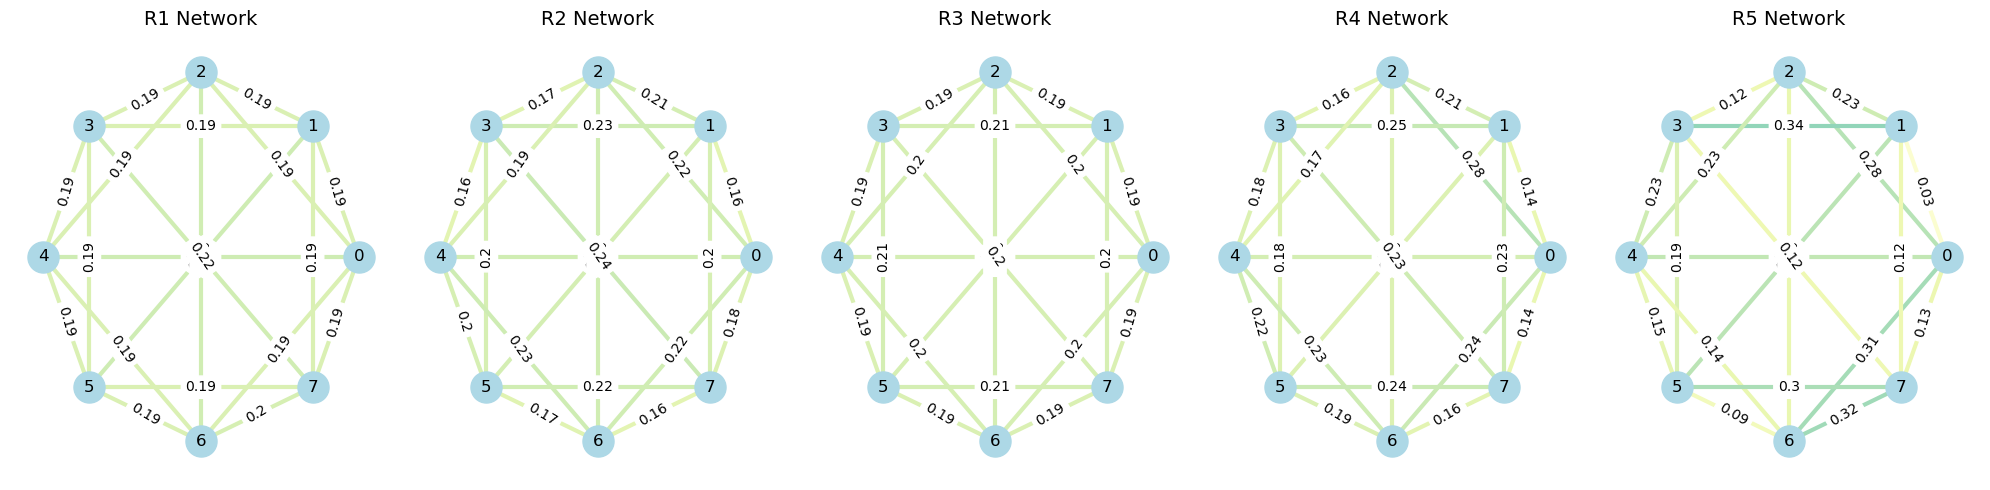

Adj_mat:[array([[0.  , 0.17, 0.17, 0.17, 0.  , 0.17, 0.17, 0.16],
       [0.17, 0.  , 0.16, 0.17, 0.17, 0.  , 0.17, 0.17],
       [0.17, 0.16, 0.  , 0.17, 0.17, 0.17, 0.  , 0.17],
       [0.17, 0.17, 0.17, 0.  , 0.17, 0.17, 0.16, 0.  ],
       [0.  , 0.17, 0.17, 0.17, 0.  , 0.16, 0.17, 0.17],
       [0.17, 0.  , 0.17, 0.17, 0.16, 0.  , 0.17, 0.17],
       [0.17, 0.17, 0.  , 0.16, 0.17, 0.17, 0.  , 0.17],
       [0.16, 0.17, 0.17, 0.  , 0.17, 0.17, 0.17, 0.  ]]), array([[0.  , 0.12, 0.17, 0.2 , 0.  , 0.14, 0.17, 0.19],
       [0.12, 0.  , 0.18, 0.17, 0.16, 0.  , 0.19, 0.17],
       [0.17, 0.18, 0.  , 0.15, 0.14, 0.2 , 0.  , 0.15],
       [0.2 , 0.17, 0.15, 0.  , 0.19, 0.15, 0.13, 0.  ],
       [0.  , 0.16, 0.14, 0.19, 0.  , 0.15, 0.2 , 0.15],
       [0.14, 0.  , 0.2 , 0.15, 0.15, 0.  , 0.16, 0.19],
       [0.17, 0.19, 0.  , 0.13, 0.2 , 0.16, 0.  , 0.15],
       [0.19, 0.17, 0.15, 0.  , 0.15, 0.19, 0.15, 0.  ]]), array([[0.  , 0.17, 0.16, 0.17, 0.  , 0.17, 0.16, 0.17],
       [0.17, 0.  

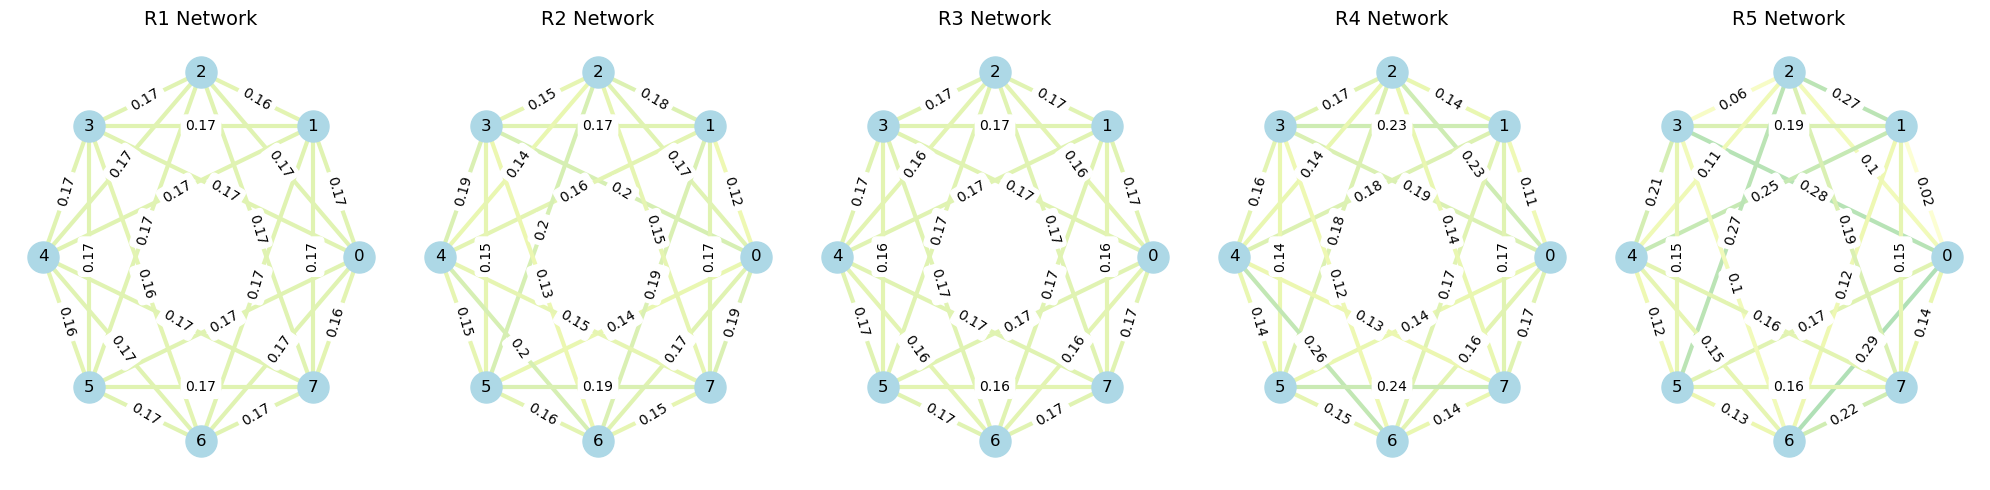

Adj_mat:[array([[0.  , 0.14, 0.15, 0.14, 0.14, 0.14, 0.14, 0.14],
       [0.14, 0.  , 0.14, 0.14, 0.15, 0.14, 0.14, 0.14],
       [0.15, 0.14, 0.  , 0.14, 0.14, 0.14, 0.14, 0.14],
       [0.14, 0.14, 0.14, 0.  , 0.14, 0.14, 0.14, 0.14],
       [0.14, 0.15, 0.14, 0.14, 0.  , 0.14, 0.14, 0.14],
       [0.14, 0.14, 0.14, 0.14, 0.14, 0.  , 0.14, 0.14],
       [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.  , 0.14],
       [0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.14, 0.  ]]), array([[0.  , 0.1 , 0.15, 0.15, 0.14, 0.15, 0.16, 0.14],
       [0.1 , 0.  , 0.15, 0.16, 0.15, 0.13, 0.16, 0.15],
       [0.15, 0.15, 0.  , 0.11, 0.14, 0.16, 0.15, 0.14],
       [0.15, 0.16, 0.11, 0.  , 0.16, 0.13, 0.13, 0.15],
       [0.14, 0.15, 0.14, 0.16, 0.  , 0.13, 0.15, 0.12],
       [0.15, 0.13, 0.16, 0.13, 0.13, 0.  , 0.13, 0.16],
       [0.16, 0.16, 0.15, 0.13, 0.15, 0.13, 0.  , 0.12],
       [0.14, 0.15, 0.14, 0.15, 0.12, 0.16, 0.12, 0.  ]]), array([[0.  , 0.14, 0.14, 0.14, 0.15, 0.15, 0.14, 0.14],
       [0.14, 0.  

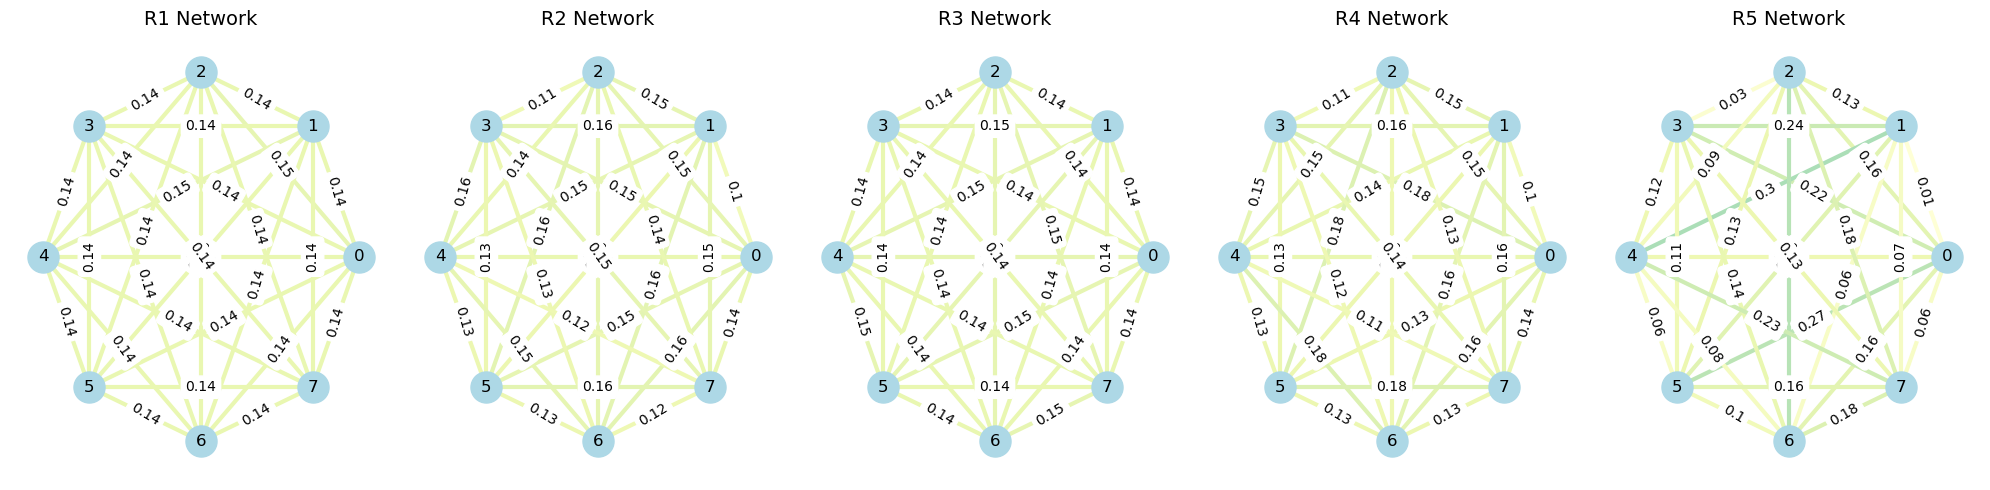

In [51]:
datasets=[[outputs_R1_c2, outputs_R2_c2, outputs_R3_c2, outputs_R4_c2,outputs_R5_c2],[outputs_R1_c4, outputs_R2_c4, outputs_R3_c4, outputs_R4_c4,outputs_R5_c4],[outputs_R1_c5, outputs_R2_c5, outputs_R3_c5, outputs_R4_c5,outputs_R5_c5],[outputs_R1_c6, outputs_R2_c6, outputs_R3_c6, outputs_R4_c6,outputs_R5_c6],[outputs_R1_cn, outputs_R2_cn, outputs_R3_cn, outputs_R4_cn,outputs_R5_cn]]
conn_names = ['c2', 'c4', 'c5', 'c6', 'cn']
# Example: four different datasets of node pairs (replace with your real data)
dataset_titles = ["R1 Network", "R2 Network", "R3 Network", "R4 Network", "R5 Network"]

# Loop over datasets and connection names
for dataset, conn in zip(datasets, conn_names):
    # Define the layout for 5 subplots side by side (1 row, 5 columns)
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # 1x5 grid of subplots (side by side)
    
    # Generate a consistent node position layout across all datasets
    # Flatten the datasets to extract individual nodes
    all_nodes = set([node for dataset in outputs_R1_c2 for sublist in dataset for pair in sublist for node in pair])
    G_all = nx.Graph()
    G_all.add_nodes_from(all_nodes)
    pos = nx.circular_layout(G_all)  # Fixed layout for nodes
    
    # Colormaps for each dataset (optional: you can change these)
    colormaps = [cm.YlGnBu] * 5  # Assuming same colormap for all 5 plots
    
    adj_mats=[]
    # Visualize the ensemble average for each dataset type
    for i, data in enumerate(dataset):
        # Compute the ensemble average adjacency matrix for this dataset type
        adj_matrix = compute_ensemble_average(data)
        adj_mats.append(adj_matrix)
        # Plot the average adjacency matrix
        visualize_network(adj_matrix, axs[i], dataset_titles[i], pos, colormaps[i])
    print(f'Adj_mat:{adj_mats}')
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.savefig(f'Emergent_interaction_network_{size}q_conn_{conn}_all_rule_ensembled_average_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [23]:
#Histogram of weight distribution
import numpy as np
import matplotlib.pyplot as plt

# Assume you have your adjacency matrix as a NumPy array
# For example, you can use the first adjacency matrix from your previous computation
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Remove the zeros from the data
    flattened_values_nonzero = flattened_values[flattened_values != 0]
    
    # Step 3: Plot the histogram
    plt.figure(figsize=(15, 6))
    bins = np.linspace(0, 100, 100)
    plt.hist(flattened_values_nonzero, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlim(left=0,right=100)  # Start x-axis from 1
    plt.title('Histogram of Adjacency Matrix Values (Excluding Zeros)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

NameError: name 'adjacency_matrices' is not defined

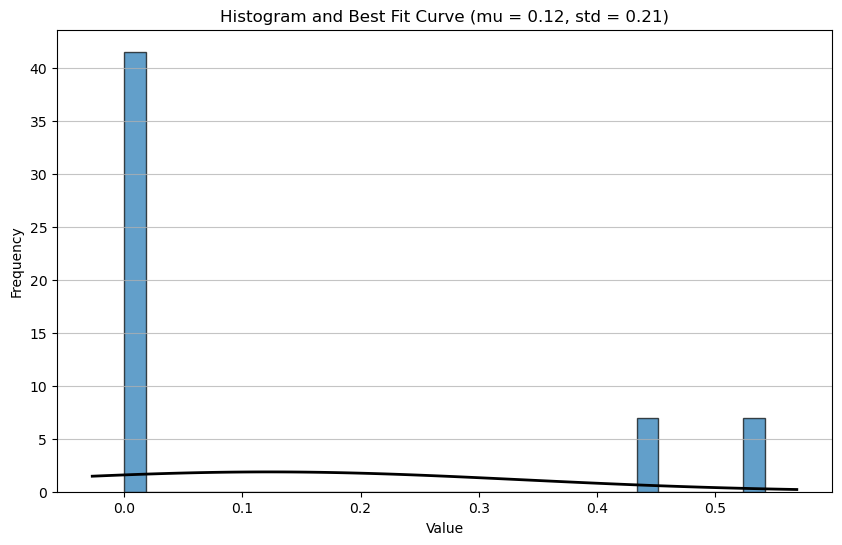

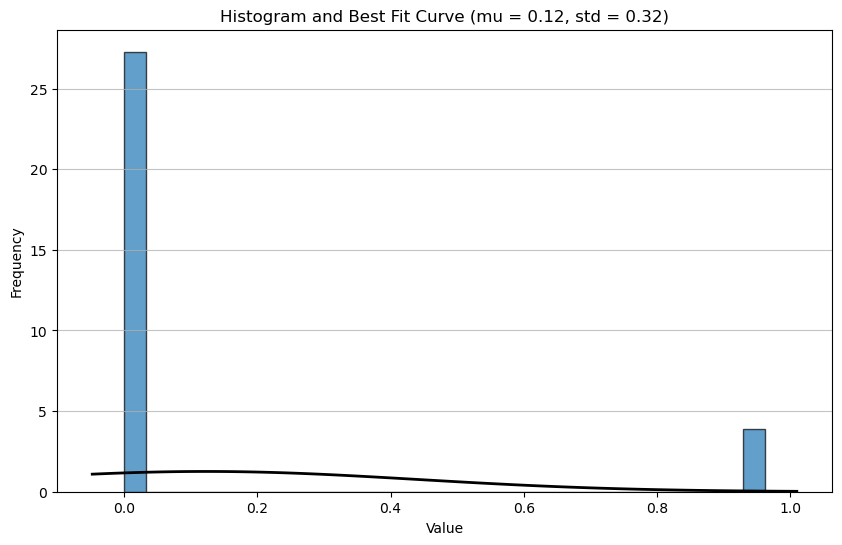

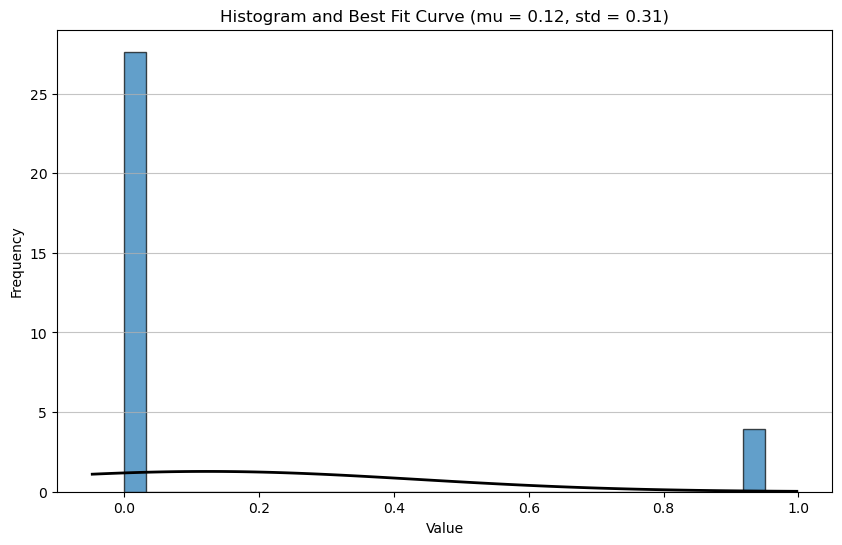

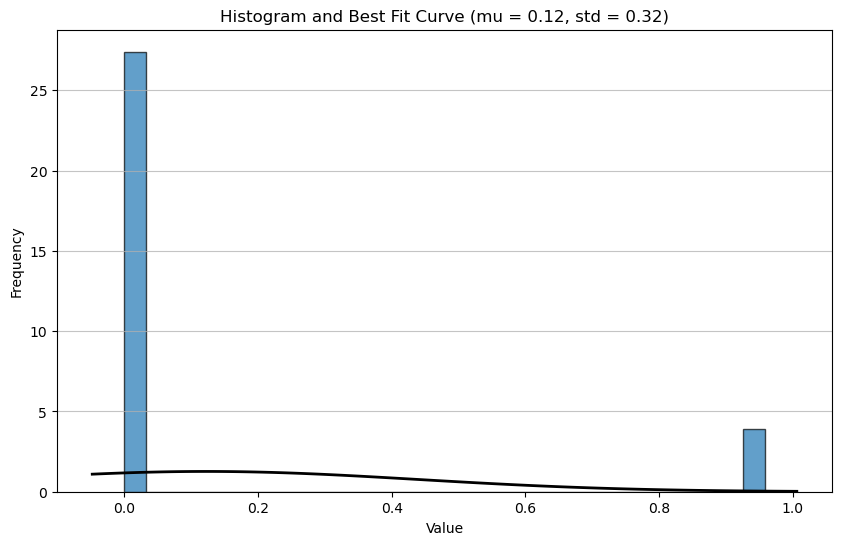

In [122]:
#Histogram with gaussian 
from scipy.stats import norm

# Give you have your adjacency matrix as a NumPy array
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Plot the histogram
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(flattened_values, bins=30, density=True, edgecolor='black', alpha=0.7)

    # Step 3: Fit the data to a normal distribution and plot the best fit curve
    mu, std = norm.fit(flattened_values)  # Mean and standard deviation of the best fit
    xmin, xmax = plt.xlim()  # Get the x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Gaussian probability density function
    plt.plot(x, p, 'k', linewidth=2)  # Plot the fitted curve

    # Labels and title
    plt.title(f'Histogram and Best Fit Curve (mu = {mu:.2f}, std = {std:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.grid(axis='y', alpha=0.75)
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


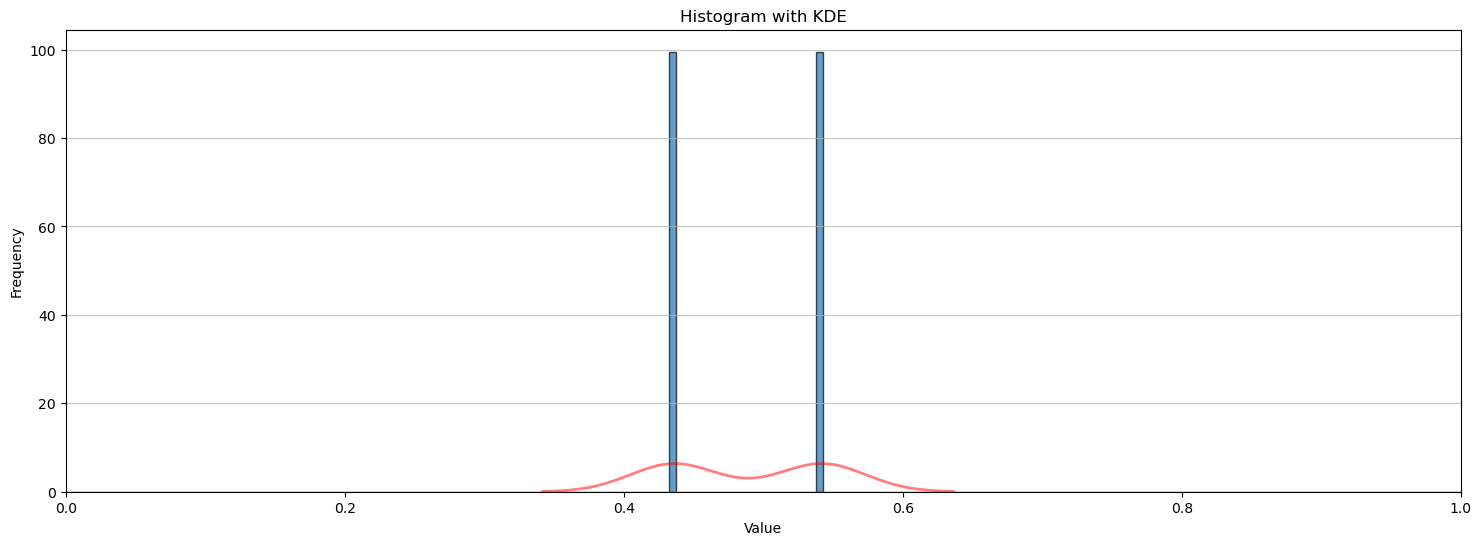

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


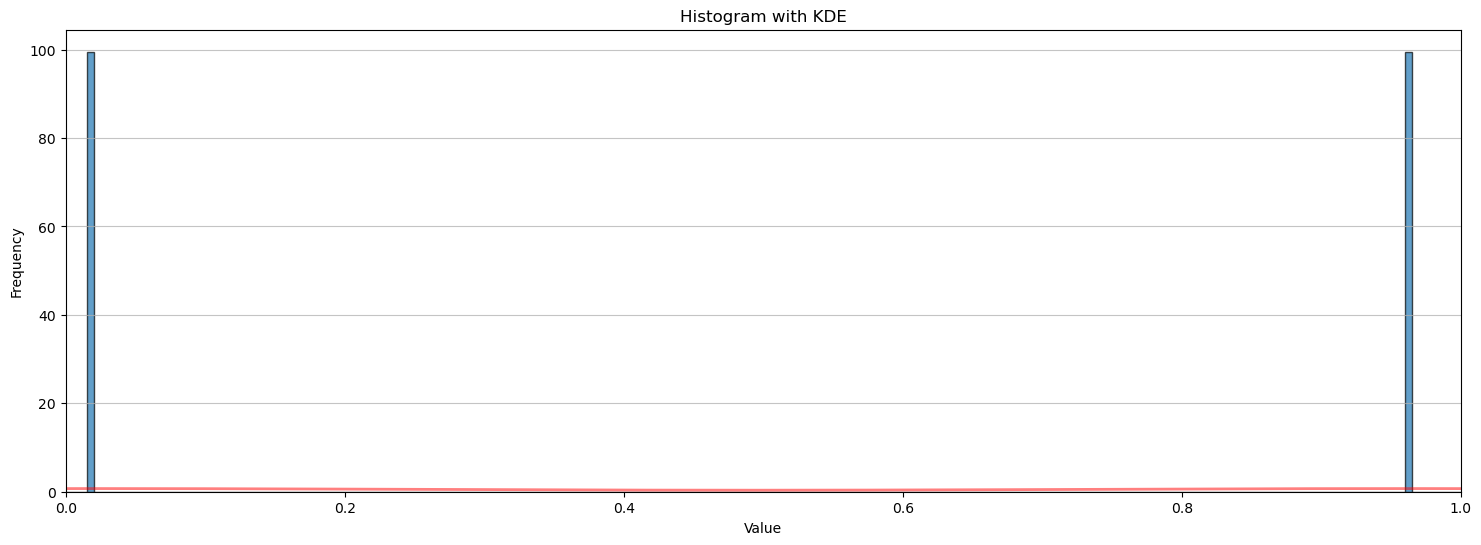

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


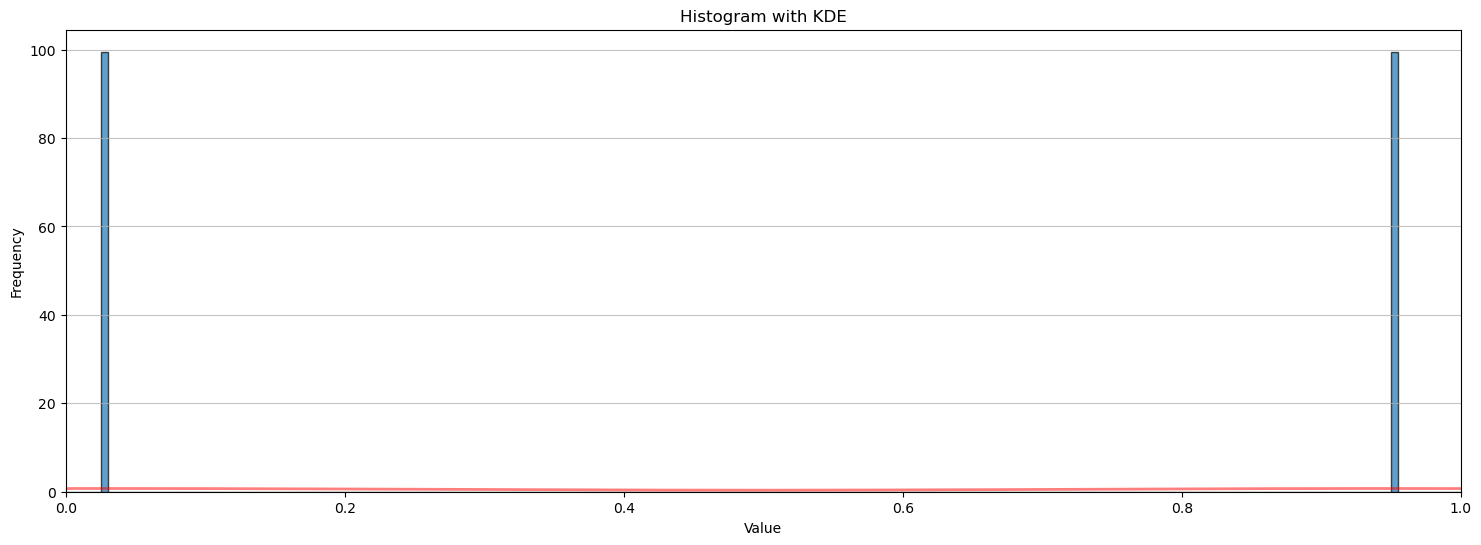

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


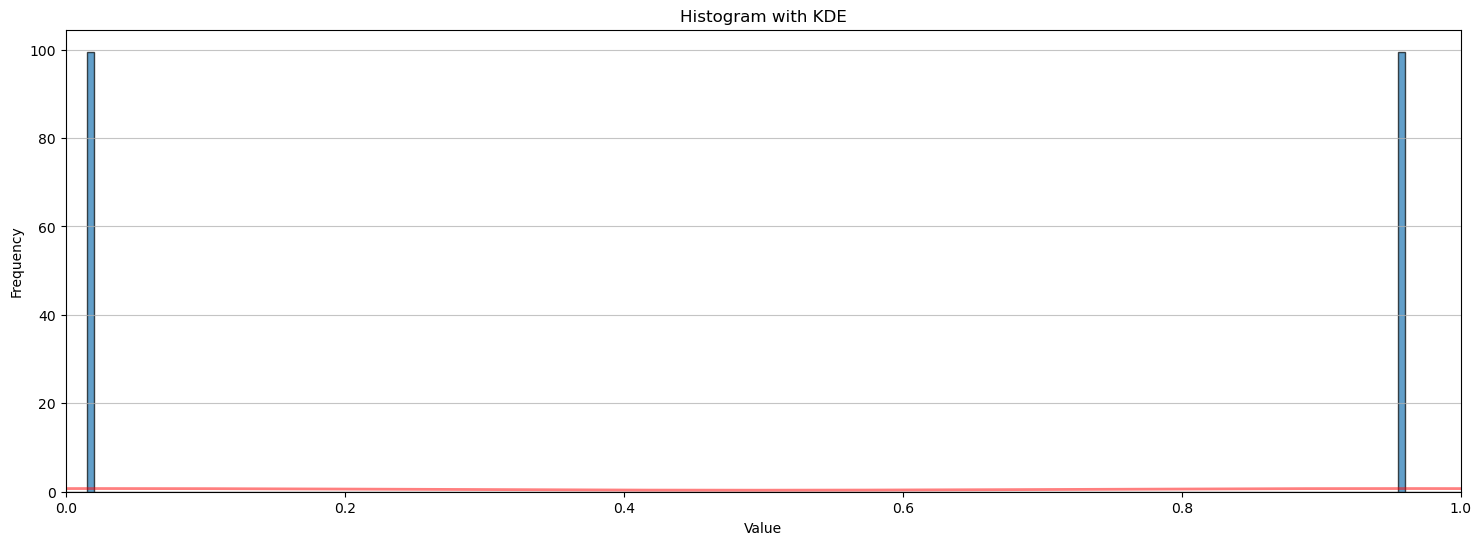

In [123]:
#Histogram with Kernal density estimate
import seaborn as sns

# Assume your adjacency matrix is processed as before
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Remove the zeros from the data
    flattened_values_nonzero = flattened_values[flattened_values != 0]
    
    # Step 3: Plot the histogram
    plt.figure(figsize=(18, 6))
    bins = np.linspace(0, 1, 200)  # 20 bins evenly spaced between 0 and 1
    plt.hist(flattened_values_nonzero, bins=bins, edgecolor='black', alpha=0.7, density=True)
    plt.xlim(left=0,right=1)  # Start x-axis from 1


    # Step 4: Plot the KDE (Kernel Density Estimate)
    sns.kdeplot(flattened_values_nonzero, color='red',alpha=0.5, linewidth=2)
    
    plt.title('Histogram with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [241]:
# Network for a particular seed
# Function to visualize each dataset
def visualize_network(dataset, ax, title, pos, cmap):
    # Flatten the dataset into a list of tuples representing pairs
    edges = [tuple(sorted(pair)) for sublist in dataset for pair in sublist]
    vmin=0
    vmax=1

    # Count the number of times each node pair appears
    edge_weights = Counter(edges)

    # Create a graph
    G = nx.Graph()

    # Add edges along with their weights
    for edge, weight in edge_weights.items():
        G.add_edge(edge[0], edge[1], weight=np.round(weight/489,4))

    edges = list(G.edges)

    # Get the edge weights to visualize them
    weights = np.array([G[u][v]['weight'] for u, v in G.edges()])
    weights = np.round(weights, 4)

    # Normalize weights for color mapping
    norm = plt.Normalize(vmin, vmax)

    # Map edge weights to colors using the given colormap
    edge_colors = [cmap(norm(w)) for w in weights]

    # Draw the graph with node labels, use color to represent the weight
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500,
            edge_color=edge_colors, width=2, ax=ax)

    # Draw edge labels to show weights
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    # Add a color bar to show the weight scale
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    #plt.colorbar(sm, ax=ax, label="Edge weight")

    # Add a title to each subplot
    ax.set_title(title)

    n_nodes = max(max(edge) for edge in edges) + 1  # Ensure it covers all nodes
    adj_matrix = np.zeros((n_nodes, n_nodes))

    for (edge, weight) in zip(edges, weights):
        adj_matrix[edge[0], edge[1]] = weight
        adj_matrix[edge[1], edge[0]] = weight
    adj_matrix = np.round(adj_matrix, 4)

    print(f"Adjacency Matrix for {title}:\n{adj_matrix}\n")
    return adj_matrix

In [243]:
visualize_network(outputs_R5_c2[4], ax, "Network Visualization", pos, cmap)

Adjacency Matrix for Network Visualization:
[[0.    0.998 0.    0.    0.    0.    0.    0.002]
 [0.998 0.    0.002 0.    0.    0.    0.    0.   ]
 [0.    0.002 0.    0.998 0.    0.    0.    0.   ]
 [0.    0.    0.998 0.    0.002 0.    0.    0.   ]
 [0.    0.    0.    0.002 0.    0.998 0.    0.   ]
 [0.    0.    0.    0.    0.998 0.    0.002 0.   ]
 [0.    0.    0.    0.    0.    0.002 0.    0.998]
 [0.002 0.    0.    0.    0.    0.    0.998 0.   ]]



array([[0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.002],
       [0.998, 0.   , 0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.002, 0.   , 0.998, 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.998, 0.   , 0.002, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.002, 0.   , 0.998, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.998, 0.   , 0.002, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.002, 0.   , 0.998],
       [0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.998, 0.   ]])

Adjacency Matrix for R1 Network:
[[0.     0.5256 0.     0.     0.     0.     0.     0.4744]
 [0.5256 0.     0.4744 0.     0.     0.     0.     0.    ]
 [0.     0.4744 0.     0.5256 0.     0.     0.     0.    ]
 [0.     0.     0.5256 0.     0.4744 0.     0.     0.    ]
 [0.     0.     0.     0.4744 0.     0.5256 0.     0.    ]
 [0.     0.     0.     0.     0.5256 0.     0.4744 0.    ]
 [0.     0.     0.     0.     0.     0.4744 0.     0.5256]
 [0.4744 0.     0.     0.     0.     0.     0.5256 0.    ]]

Adjacency Matrix for R2 Network:
[[0.     0.9673 0.     0.     0.     0.     0.     0.0327]
 [0.9673 0.     0.0327 0.     0.     0.     0.     0.    ]
 [0.     0.0327 0.     0.9673 0.     0.     0.     0.    ]
 [0.     0.     0.9673 0.     0.0327 0.     0.     0.    ]
 [0.     0.     0.     0.0327 0.     0.9673 0.     0.    ]
 [0.     0.     0.     0.     0.9673 0.     0.0327 0.    ]
 [0.     0.     0.     0.     0.     0.0327 0.     0.9673]
 [0.0327 0.     0.     0.     0.     0.     0.9

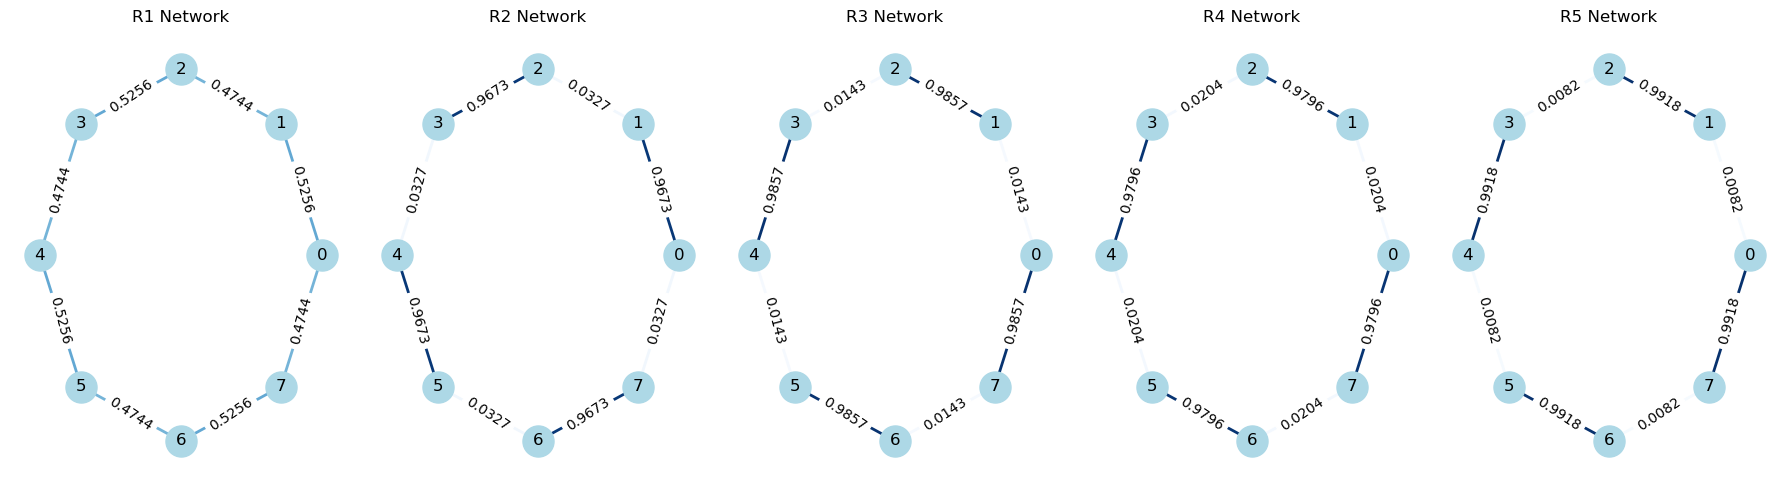

In [218]:
seed=3
conn='c2'
datasets = [outputs_R1_c2[seed], outputs_R2_c2[seed], outputs_R3_c2[seed], outputs_R4_c2[seed],outputs_R5_c2[seed]]  # Replace these with your actual datasets
dataset_titles = ["R1 Network", "R2 Network", "R3 Network", "R4 Network","R5 Network"]

# Define the layout and figure for the subplots (1x5 grid for 5 plots)
fig, axs = plt.subplots(1, 5, figsize=(18, 5))  # 1x5 grid of subplots

# Flatten the subplots array for easier indexing (it’s already 1D but this is for clarity)
axs = axs.flatten()

# Generate a consistent node position layout across all datasets
all_nodes = set([node for dataset in datasets for sublist in dataset for pair in sublist for node in pair])
G_all = nx.Graph()
G_all.add_nodes_from(all_nodes)
pos = nx.circular_layout(G_all)  # Fixed layout for nodes

# Colormaps for each dataset (optional: you can change these)
colormaps = [cm.Blues, cm.Blues, cm.Blues, cm.Blues, cm.Blues]  # Use the same colormap for simplicity

# Store adjacency matrices for further processing
adjacency_matrices = []

# Visualize each dataset in its respective subplot and output the adjacency matrix
for i, dataset in enumerate(datasets):
    ax = axs[i]  # Access the i-th subplot
    adj_matrix = visualize_network(dataset, ax, dataset_titles[i], pos, colormaps[i])
    adjacency_matrices.append(adj_matrix)  # Store the adjacency matrix in the list

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(f'Emergent_interaction_network_{size}q_conn_{conn}_all_rule_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
plt.show()
# Further processing with adjacency_matrices if needed
# Now adjacency_matrices is a list of NumPy arrays



Adjacency Matrix for R1 Network:
[[  0.  33. 109.   0.   0.   0. 235. 112.]
 [ 33.   0. 143. 174.   0.   0.   0. 139.]
 [109. 143.   0.  72. 165.   0.   0.   0.]
 [  0. 174.  72.   0. 102. 141.   0.   0.]
 [  0.   0. 165. 102.   0. 144.  78.   0.]
 [  0.   0.   0. 141. 144.   0.  71. 133.]
 [235.   0.   0.   0.  78.  71.   0. 105.]
 [112. 139.   0.   0.   0. 133. 105.   0.]]

Adjacency Matrix for R2 Network:
[[  0.  86. 185.   0.   0.   0. 135.  83.]
 [ 86.   0.  86. 130.   0.   0.   0. 187.]
 [185.  86.   0.  95. 123.   0.   0.   0.]
 [  0. 130.  95.   0. 108. 156.   0.   0.]
 [  0.   0. 123. 108.   0.  91. 167.   0.]
 [  0.   0.   0. 156.  91.   0. 105. 137.]
 [135.   0.   0.   0. 167. 105.   0.  82.]
 [ 83. 187.   0.   0.   0. 137.  82.   0.]]

Adjacency Matrix for R3 Network:
[[  0. 116. 128.   0.   0.   0. 149.  96.]
 [116.   0. 106. 127.   0.   0.   0. 140.]
 [128. 106.   0. 125. 130.   0.   0.   0.]
 [  0. 127. 125.   0. 116. 121.   0.   0.]
 [  0.   0. 130. 116.   0. 100. 143. 

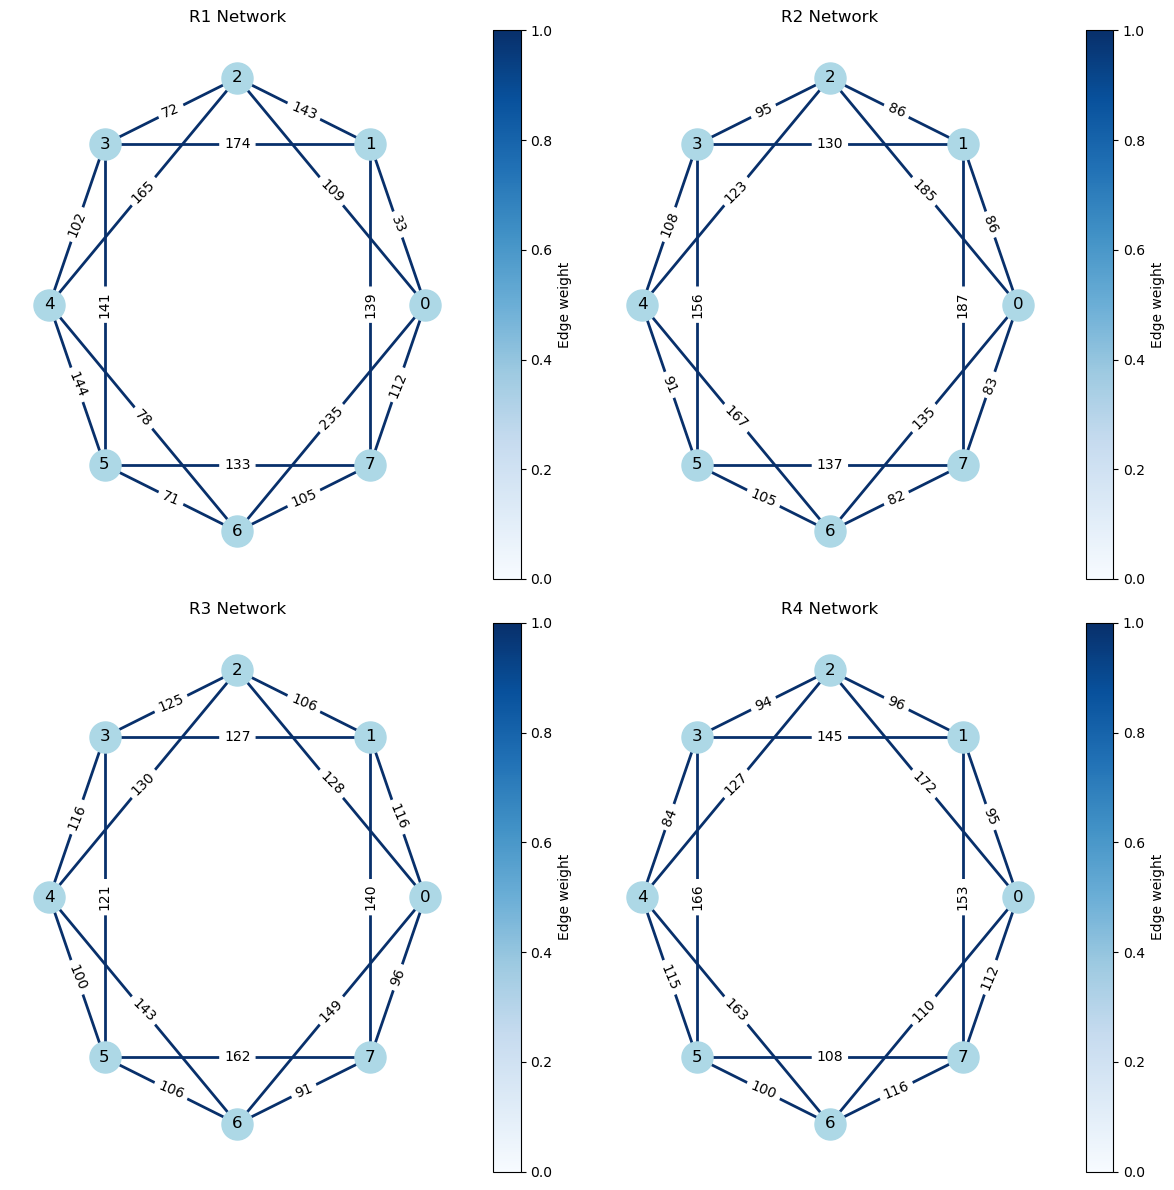

In [196]:
seed=5
conn='c4'
datasets = [outputs_R5_c4[seed], outputs_R2_c4[seed], outputs_R3_c4[seed], outputs_R4_c4[seed]]  # Replace these with your actual datasets
dataset_titles = ["R1 Network", "R2 Network", "R3 Network", "R4 Network"]

# Define the layout and figure for the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # 2x2 grid of subplots

# Generate a consistent node position layout across all datasets
# Flatten the datasets to extract individual nodes, assuming each sublist contains node pairs
all_nodes = set([node for dataset in datasets for sublist in dataset for pair in sublist for node in pair])
G_all = nx.Graph()
G_all.add_nodes_from(all_nodes)
pos = nx.circular_layout(G_all)  # Fixed layout for nodes

# Colormaps for each dataset (optional: you can change these)
colormaps = [cm.Blues, cm.Blues, cm.Blues, cm.Blues]

# Store adjacency matrices for further processing
adjacency_matrices = []

# Visualize each dataset in its respective subplot and output the adjacency matrix
for i, dataset in enumerate(datasets):
    row, col = divmod(i, 2)
    adj_matrix = visualize_network(dataset, axs[row, col], dataset_titles[i], pos, colormaps[i])
    #store all adjacency matrices in a list
    adjacency_matrices.append(adj_matrix)  # Store the matrix in a list

# Adjust layout and display the plot
plt.tight_layout()
plt.savefig(f'Emergent_interaction_network_{size}q_conn_{conn}_all_rule_seed_{seed}_{dataset_label}.pdf', format='pdf', bbox_inches='tight')
plt.show()

# Further processing with adjacency_matrices if needed
# Now adjacency_matrices is a list of NumPy arrays

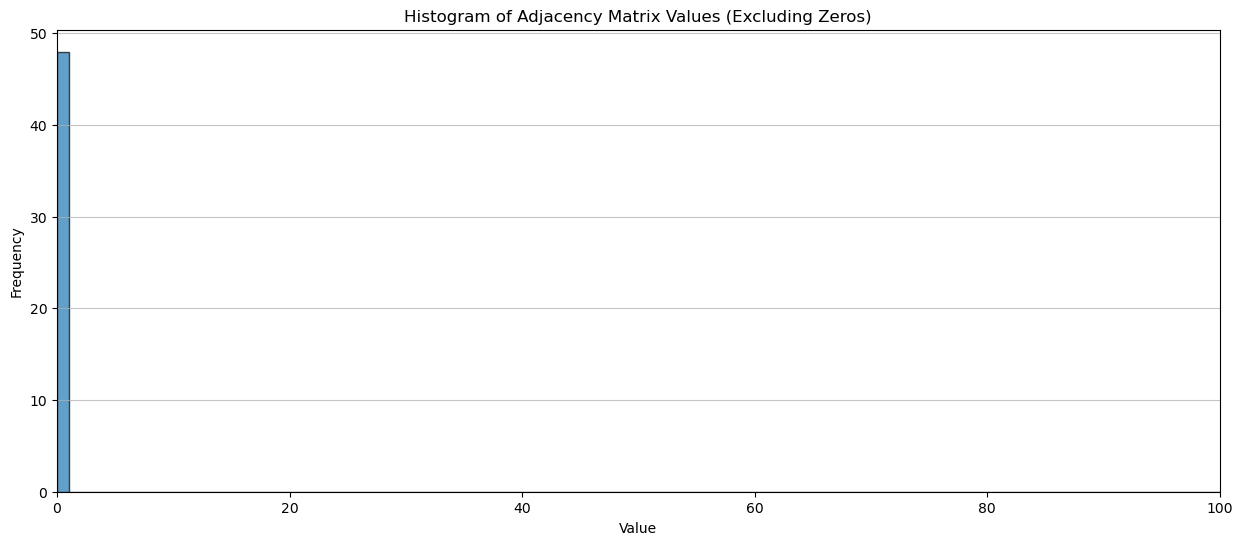

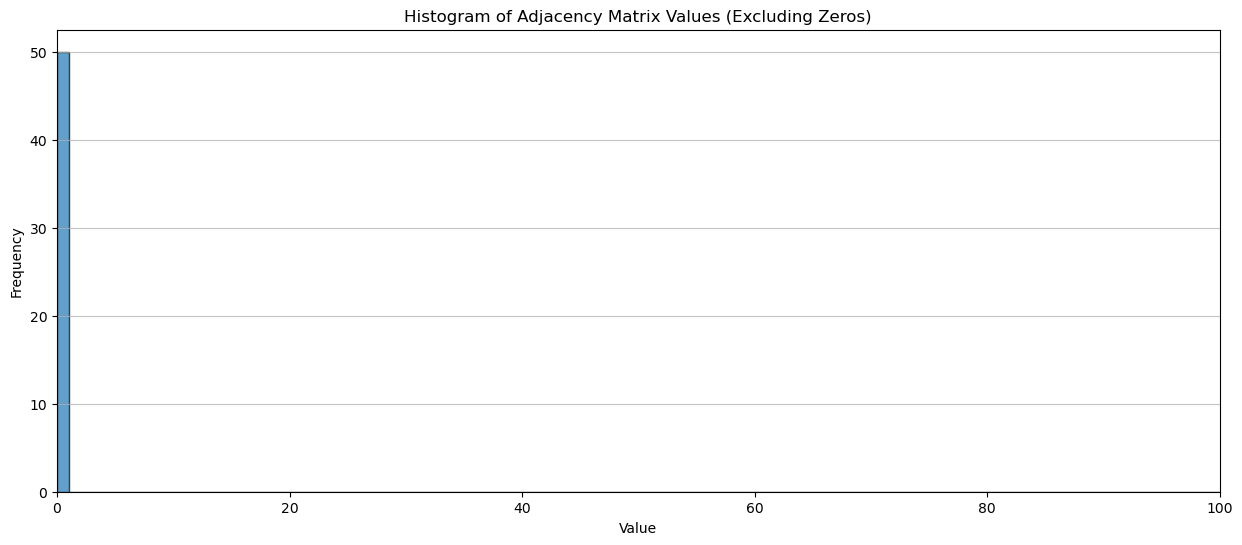

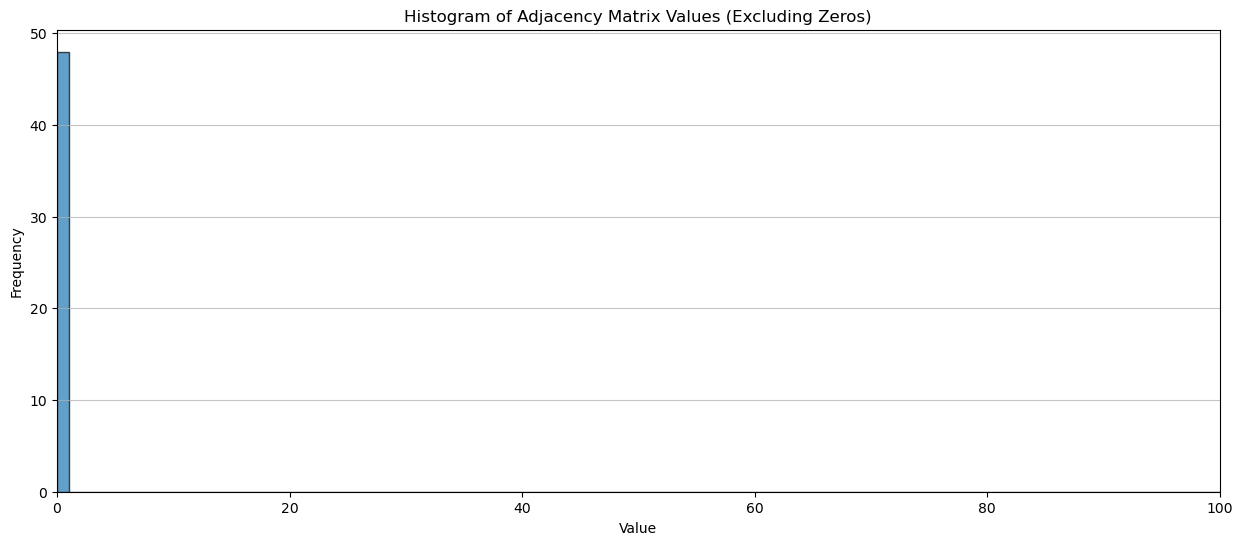

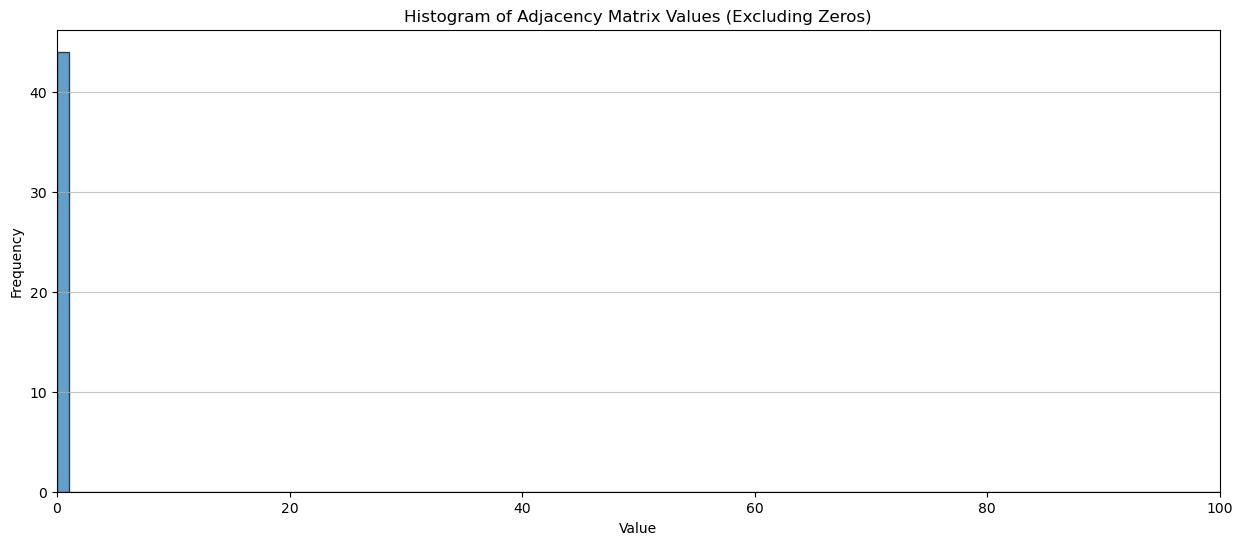

In [111]:
#Histogram of weight distribution
# Assume you have your adjacency matrix as a NumPy array
# For example, you can use the first adjacency matrix from your previous computation
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Remove the zeros from the data
    flattened_values_nonzero = flattened_values[flattened_values != 0]
    
    # Step 3: Plot the histogram
    plt.figure(figsize=(15, 6))
    bins = np.linspace(0, 100, 100)
    plt.hist(flattened_values_nonzero, bins=bins, edgecolor='black', alpha=0.7)
    plt.xlim(left=0,right=100)  # Start x-axis from 1
    plt.title('Histogram of Adjacency Matrix Values (Excluding Zeros)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


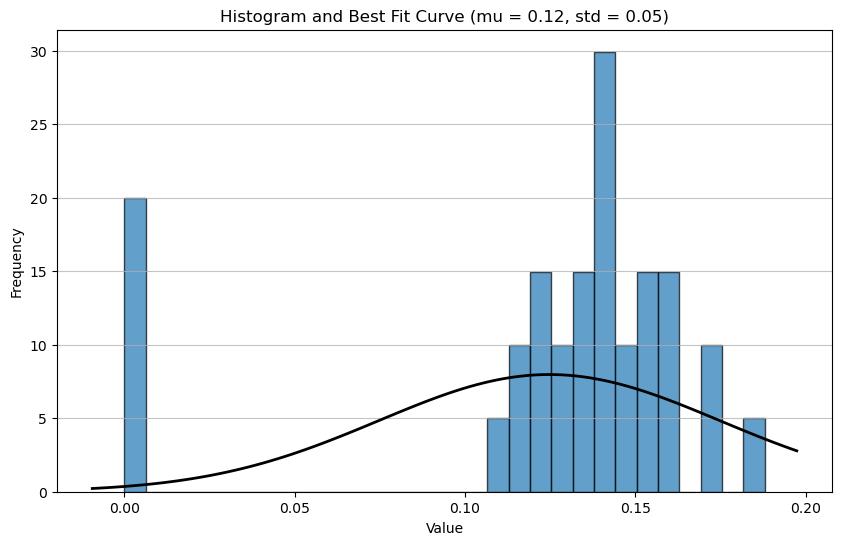

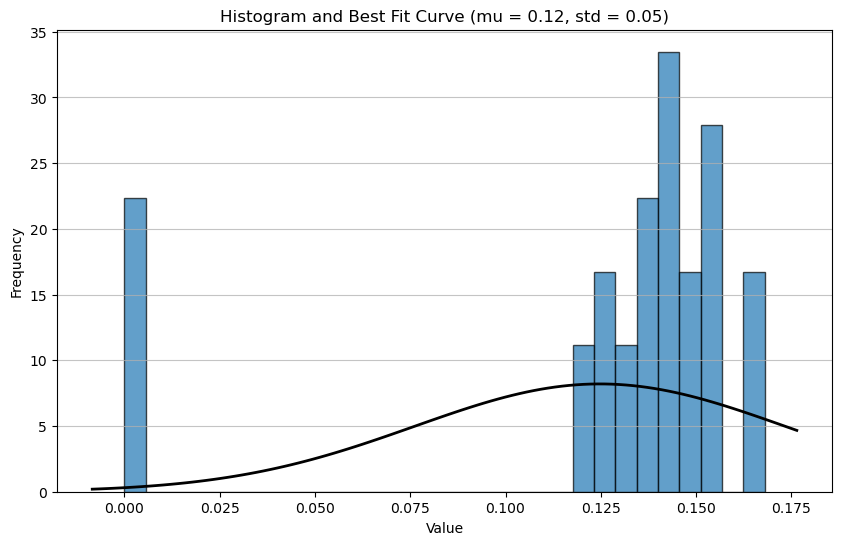

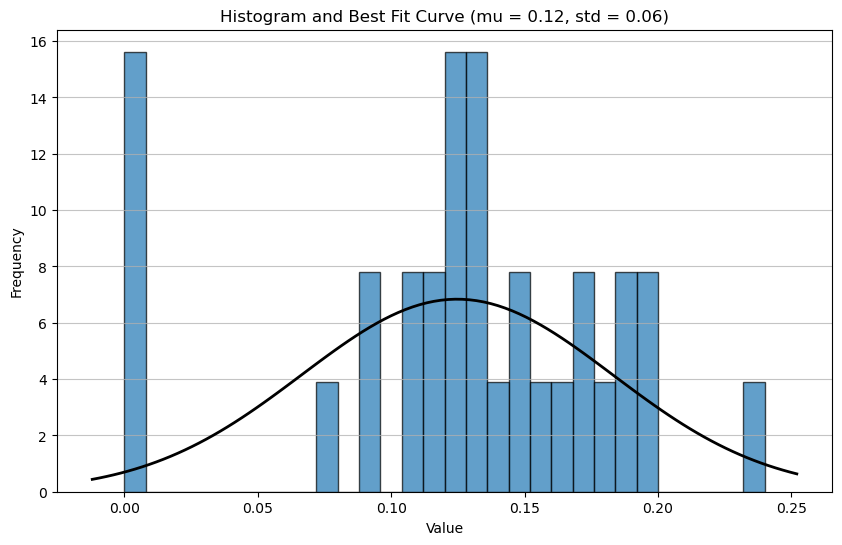

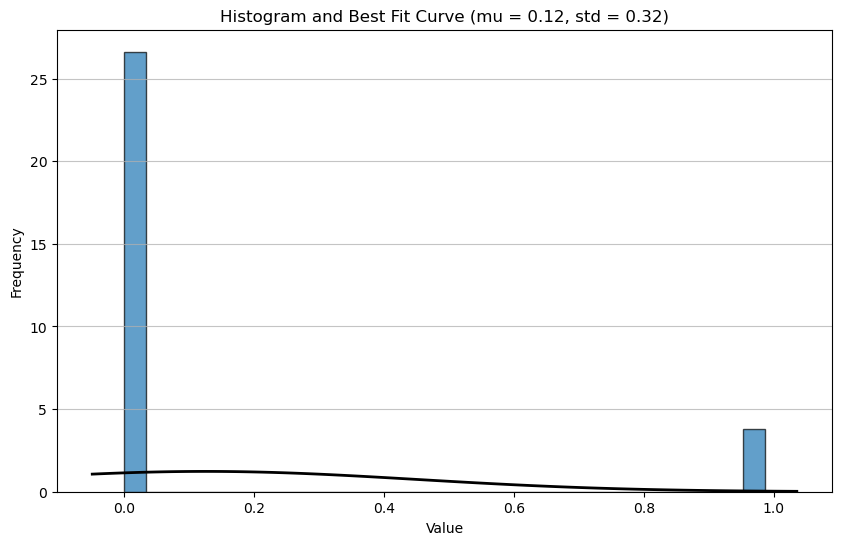

In [33]:
#Histogram with gaussian fit
from scipy.stats import norm

# Assume you have your adjacency matrix as a NumPy array
# For example, using the first adjacency matrix from your previous computation
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Plot the histogram
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(flattened_values, bins=30, density=True, edgecolor='black', alpha=0.7)

    # Step 3: Fit the data to a normal distribution and plot the best fit curve
    mu, std = norm.fit(flattened_values)  # Mean and standard deviation of the best fit
    xmin, xmax = plt.xlim()  # Get the x-axis limits
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)  # Gaussian probability density function
    plt.plot(x, p, 'k', linewidth=2)  # Plot the fitted curve

    # Labels and title
    plt.title(f'Histogram and Best Fit Curve (mu = {mu:.2f}, std = {std:.2f})')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.grid(axis='y', alpha=0.75)
    plt.show()


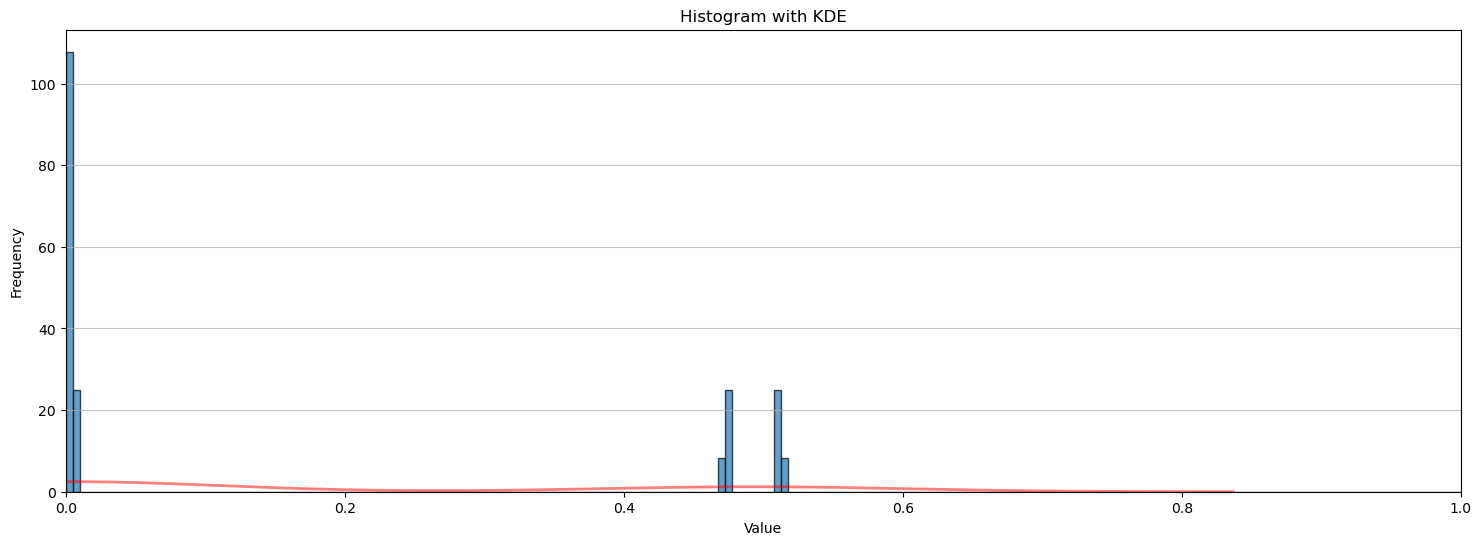

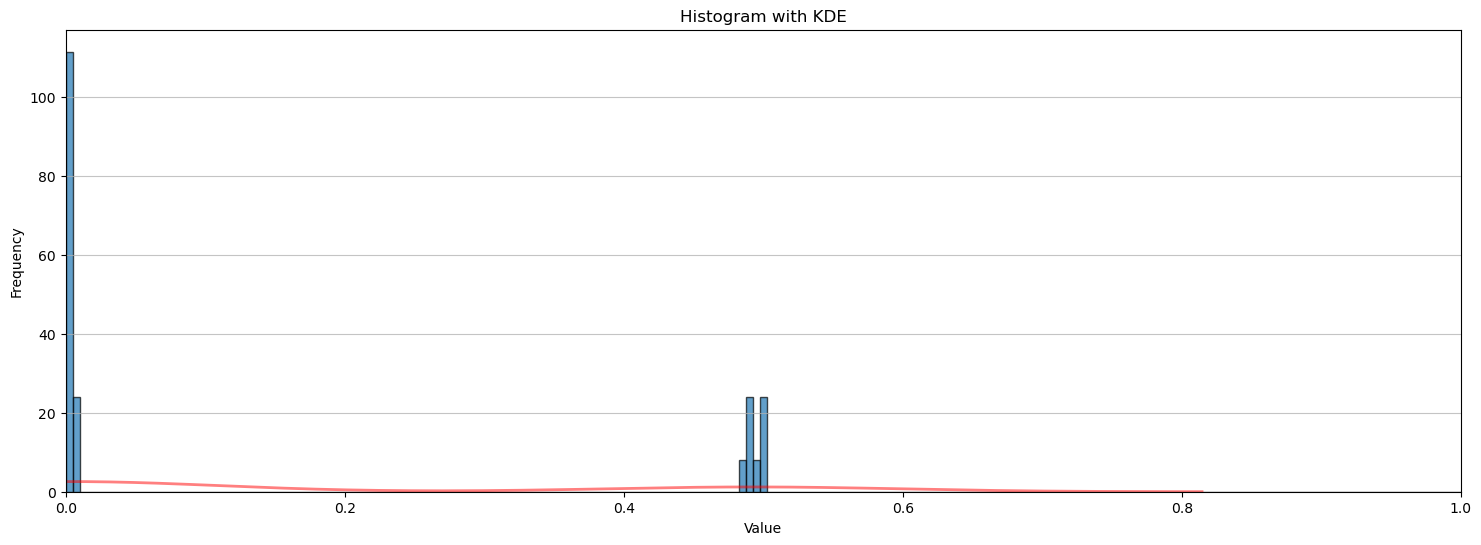

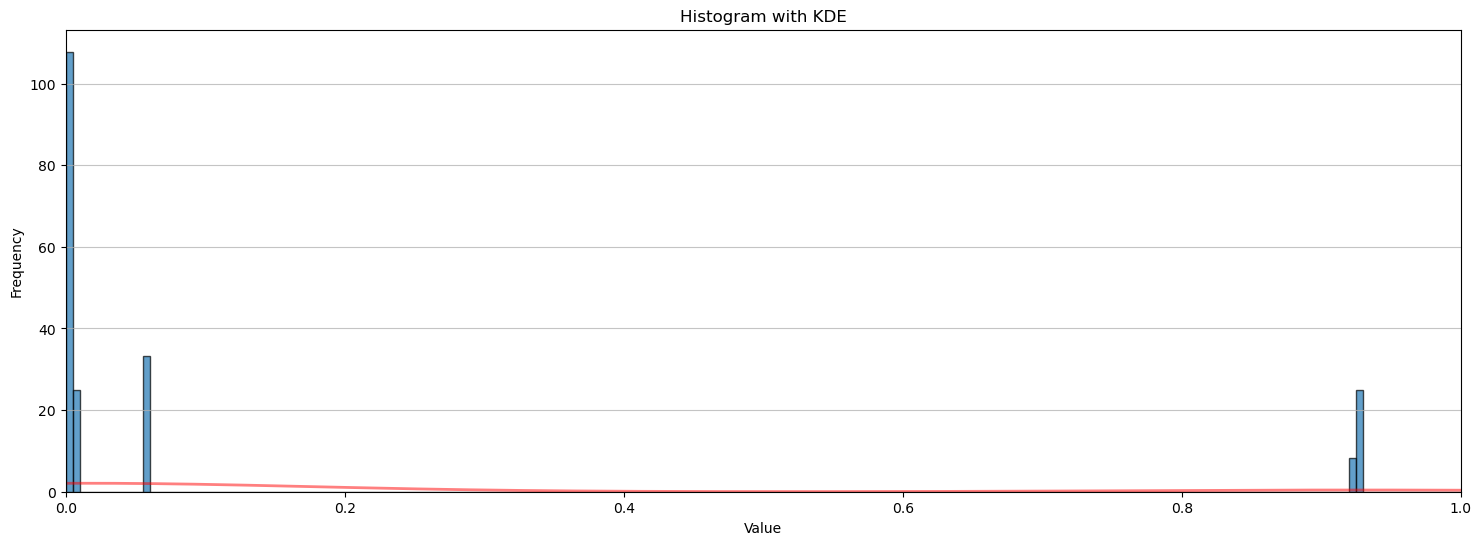

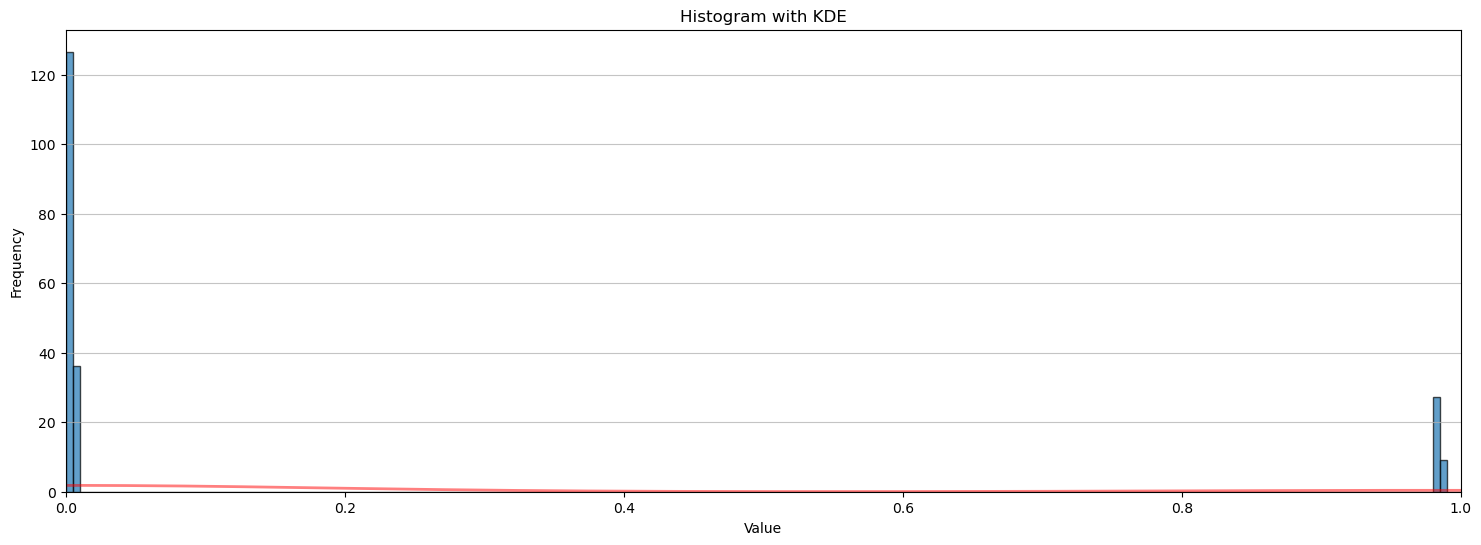

In [113]:
#Histogram with Kernal density estimate
import seaborn as sns

# Assume your adjacency matrix is processed as before
for adj_mat in [adjacency_matrices[0], adjacency_matrices[1], adjacency_matrices[2], adjacency_matrices[3]]:
    adjacency_matrix = adj_mat  # Replace with your desired adjacency matrix
    
    # Step 1: Flatten the adjacency matrix to a 1D array
    flattened_values = adjacency_matrix.flatten()
    
    # Step 2: Remove the zeros from the data
    flattened_values_nonzero = flattened_values[flattened_values != 0]
    
    # Step 3: Plot the histogram
    plt.figure(figsize=(18, 6))
    bins = np.linspace(0, 1, 200)  # 20 bins evenly spaced between 0 and 1
    plt.hist(flattened_values_nonzero, bins=bins, edgecolor='black', alpha=0.7, density=True)
    plt.xlim(left=0,right=1)  # Start x-axis from 1


    # Step 4: Plot the KDE (Kernel Density Estimate)
    sns.kdeplot(flattened_values_nonzero, color='red',alpha=0.5, linewidth=2)
    
    plt.title('Histogram with KDE')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


In [ ]:
Averaging by looking at spectral property 

In [40]:
import numpy as np
import networkx as nx
from scipy.linalg import eigh

# Assume adjacency_matrices contains the adjacency matrices for your graphs
# Ensure that they are square matrices
graphs = [nx.from_numpy_array(adj) for adj in adjacency_matrices]

# Step 1: Compute the Laplacian for each graph
laplacians = [nx.laplacian_matrix(g).toarray() for g in graphs]

# Step 2: Compute eigenvalues and eigenvectors for each Laplacian
eigenvalues = []
eigenvectors = []
for lap in laplacians:
    eigvals, eigvecs = eigh(lap)  # eigh for symmetric matrices
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)

# Step 3: Average the eigenvalues and eigenvectors
avg_eigenvalues = np.mean(eigenvalues, axis=0)  # Average eigenvalues
avg_eigenvectors = np.mean(eigenvectors, axis=0)  # Average eigenvectors

# Step 4: Reconstruct the Laplacian from averaged eigenvalues/vectors (optional)
L_avg = avg_eigenvectors @ np.diag(avg_eigenvalues) @ avg_eigenvectors.T

# Convert the averaged Laplacian back to an adjacency matrix (optional)
D_avg = np.diag(np.sum(L_avg, axis=1))  # Reconstruct degree matrix
A_avg = D_avg - L_avg  # Reconstruct adjacency matrix

# Convert the adjacency matrix back to a networkx graph (optional)
G_avg = nx.from_numpy_array(A_avg)

# Output the average eigenvalues and the reconstructed graph (optional)
print("Average Eigenvalues:", avg_eigenvalues)
print("Average Laplacian:\n", L_avg)
print("Reconstructed Adjacency Matrix:\n", A_avg)


Average Eigenvalues: [4.61852778e-14 7.13413625e+01 7.50037897e+01 7.76544621e+01
 8.05312708e+01 1.28261615e+02 1.34124959e+02 1.37226129e+02
 1.40739598e+02 1.45116814e+02]
Average Laplacian:
 [[  9.33603638   3.85429213  -1.12657376  -3.30231875  -3.32239658
   -8.64063631  -2.34661785   6.25127228   4.17452607  -4.87758362]
 [  3.85429213  11.53572544  -3.39913207  -2.40699092  -5.84950113
  -12.28695232  -3.73364467   6.75417633  15.02369397  -9.49166677]
 [ -1.12657376  -3.39913207   7.25330355  -3.32971468   3.13641095
   -0.76633491  -9.79765262   3.76483052  -1.14197962   5.40684264]
 [ -3.30231875  -2.40699092  -3.32971468   7.51940557   0.44948258
    8.50255465   1.93654145  -4.46512182  -8.79346984   3.88963174]
 [ -3.32239658  -5.84950113   3.13641095   0.44948258  22.90847097
    8.18470477  -6.93445005  -7.82413127 -16.14710838   5.39851813]
 [ -8.64063631 -12.28695232  -0.76633491   8.50255465   8.18470477
   28.27028086   4.35074503 -14.32236324 -21.21664591   7.92464

In [83]:
from scipy.linalg import eigh
#from a network G find the laplacian
laplacians = [nx.laplacian_matrix(G).toarray()]

# Step 2: Compute eigenvalues and eigenvectors for each Laplacian
eigenvalues = []
eigenvectors = []
for lap in laplacians:
    eigvals, eigvecs = eigh(lap)  # eigh for symmetric matrices
    eigenvalues.append(eigvals)
    eigenvectors.append(eigvecs)
eigenvalues

[array([4.44089210e-16, 6.74219290e-02, 8.09973986e-02, 9.18479945e-02,
        1.18474816e-01, 1.87063284e+00, 1.89531498e+00, 1.91155701e+00,
        1.92209578e+00, 1.94165725e+00])]

In [ ]:
#Plot the laplacians
import matplotlib.pyplot as plt

# Example data (four lists of N points)
N = 10
x = list(range(N))  # X-axis points (0, 1, 2, ..., N-1)
y1 = average_laplacian_eigenvalues(np.array(MI_adj_random))[1]    # First list of N points
y2 = average_laplacian_eigenvalues(np.array(MI_adj_greedy))[1]   # Second list
y3 = average_laplacian_eigenvalues(np.array(MI_adj_mimic))[1]  # Third list
y4 = average_laplacian_eigenvalues(np.array(MI_adj_landmax))[1]  # Fourth list

# Plot each list on the same chart
plt.plot(x, y1, label='List 1', marker='o')  # Plot with markers
plt.plot(x, y2, label='List 2', marker='x')
plt.plot(x, y3, label='List 3', marker='s')
plt.plot(x, y4, label='List 4', marker='d')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot of 4 Lists on the Same Chart')

# Add a legend to distinguish between the lists
plt.legend()

# Show the plot
plt.show()